<a href="https://colab.research.google.com/github/hanimsofia/-Prediction-for-Presence-or-Absence-of-Cardiovascular/blob/main/Data_Science_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WQD7001 Assignment 1

**Import Library**

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

**Mount Google Drive on Google Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Declare Data Path**

In [ ]:
# Declare Data Path

directory_path = "/content/gdrive/MyDrive/WQD7001-Principle Of Data Science"
cardio_data_csv = "cardio_data_processed.csv"
cardiao_data_path = os.path.join(directory_path,cardio_data_csv)
print(f"Data Path: {cardiao_data_path}")

Data Path: /content/gdrive/MyDrive/WQD7001-Principle Of Data Science/cardio_data_processed.csv


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

**Load CSV**

In [ ]:
# Load CSV
df = pd.read_csv(cardiao_data_path)
df_bp = pd.get_dummies(df, columns=['bp_category'], drop_first=True)
print(df)

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
68200  99993  19240       2     168    76.0    120     80            1     1   
68201  99995  22601       1     158   126.0    140     90            2     2   
68202  99996  19066       2     183   105.0    180     90            3     1   
68203  99998  22431       1     163    72.0    135     80            1     2   
68204  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  age

**DF Info**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

**Describe DF**

In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,49972.410498,19462.667737,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,28852.138290,2468.381854,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,0.000000,10798.000000,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,24991.000000,17656.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,50008.000000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,74878.000000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


**Check Missing Data**

In [ ]:
#check missing values
df.isnull().sum()

id                     0
age                    0
gender                 0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64

**Describe Gender**

Female: 44427
Female Percentage: 65.14%
Male: 23778
Male Percentage: 34.86%


Text(0, 0.5, '')

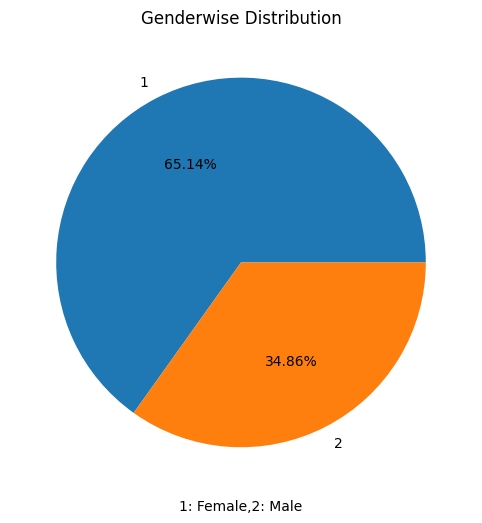

In [ ]:
# Gender of the patient. Categorical variable (1: Female, 2: Male).
# Female
gender_female = df['gender'].value_counts()[1]
print(f"Female: {gender_female}")
print("Female Percentage: {:.2f}%".format((len(df[df.gender == 1]) / (len(df.gender))*100)))
# Male
gender_male = df['gender'].value_counts()[2]
print(f"Male: {gender_male}")
print("Male Percentage: {:.2f}%".format((len(df[df.gender == 2]) / (len(df.gender))*100)))

#plotting a pie chart of Genderwise disribution
plt.figure(figsize=(10,6))
df['gender'].value_counts().plot(kind='pie',autopct='%2.2f%%')
#plt.pie(df['gender'].value_counts(),autopct='%1.1f%%')
plt.title("Genderwise Distribution")
plt.xlabel('1: Female,2: Male')
plt.ylabel('')

**Gender vs Cardio**

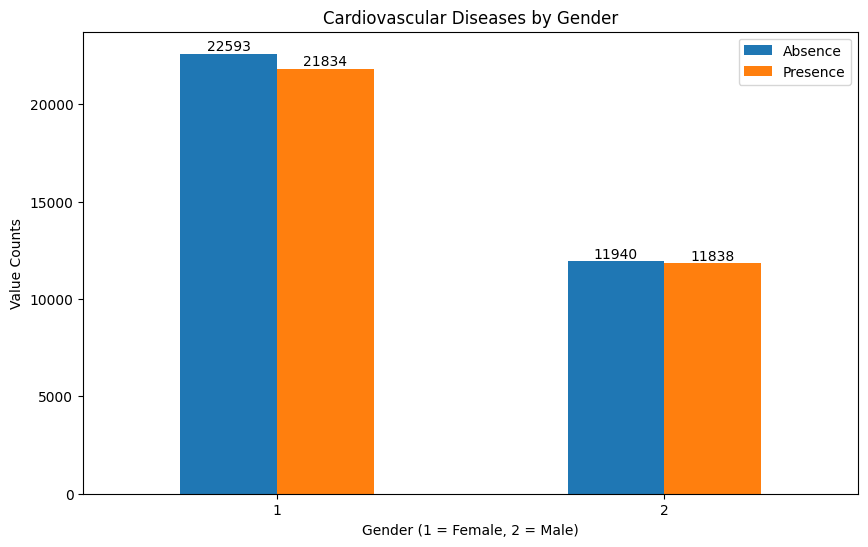

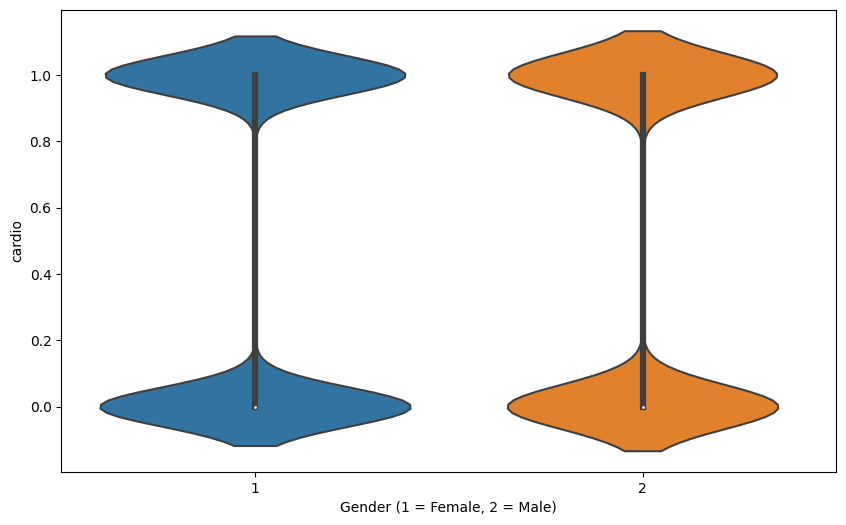

In [ ]:
ax = pd.crosstab(df.gender,df.cardio).plot(kind="bar",figsize=(10,6))
plt.title('Cardiovascular Diseases by Gender')
plt.xlabel('Gender (1 = Female, 2 = Male)')
plt.xticks(rotation=0)
plt.legend(["Absence", "Presence"])
plt.ylabel('Value Counts')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x=df.gender,y=df.cardio,data=df)
plt.xlabel("Gender (1 = Female, 2 = Male)")
plt.show()

**Describe Age**

count    68205.000000
mean        52.823635
std          6.769909
min         29.000000
25%         48.000000
50%         53.000000
75%         58.000000
max         64.000000
Name: age_years, dtype: float64
Age   Value
55    3825
53    3751
57    3568
54    3530
56    3507
59    3484
49    3336
58    3312
51    3274
52    3194
50    3151
60    3127
63    2652
61    2647
47    2140
62    2135
64    2122
45    2039
43    1981
41    1855
48    1772
39    1749
46    1594
40    1591
44    1475
42    1390
29       3
30       1
Name: age_years, dtype: int64


<Axes: xlabel='age_years'>

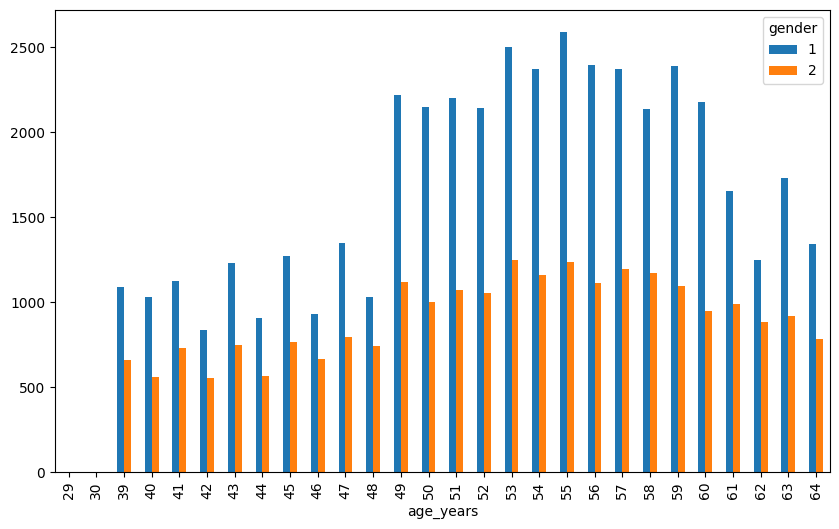

In [ ]:
age_describe = df['age_years'].describe()
print(age_describe)
age_count = df['age_years'].value_counts()
print(f"Age   Value")
print(age_count)
pd.crosstab(df.age_years,df.gender).plot(kind="bar",figsize=(10,6))
# pd.crosstab(df['age_years'],df['gender']).plot.bar()

**Age vs Cardio**

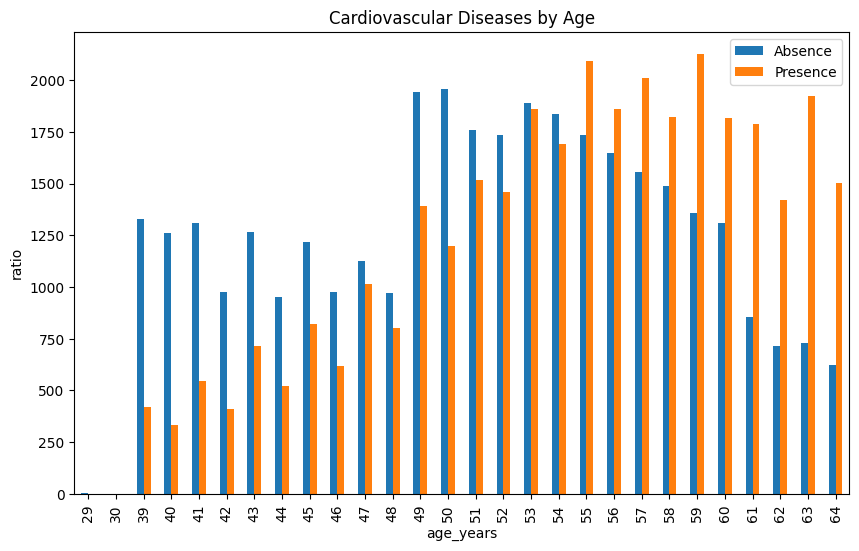

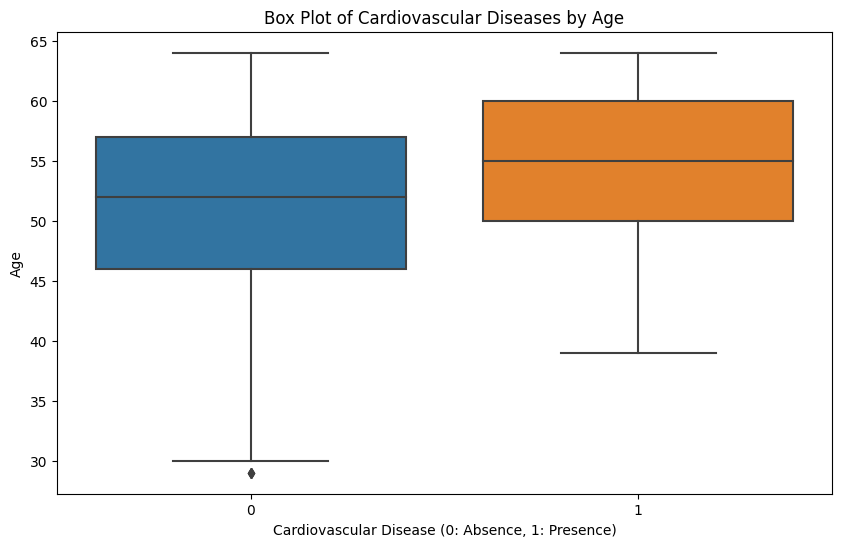

In [ ]:
pd.crosstab(df.age_years,df.cardio).plot(kind="bar",figsize=(10,6))
plt.title('Cardiovascular Diseases by Age')
plt.xlabel('age_years')
plt.ylabel('ratio')
plt.legend(["Absence", "Presence"])
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cardio', y='age_years')
plt.title('Box Plot of Cardiovascular Diseases by Age')
plt.xlabel('Cardiovascular Disease (0: Absence, 1: Presence)')
plt.ylabel('Age')
plt.show()

**BP Categories**

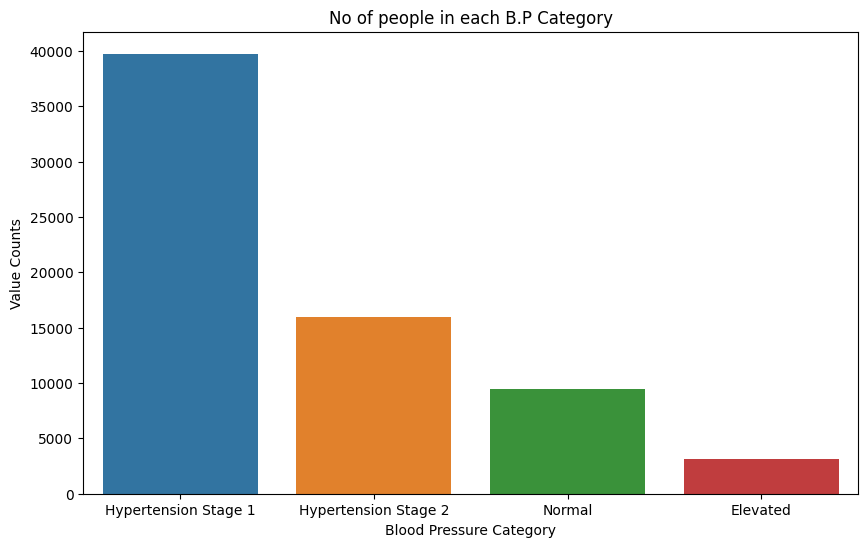

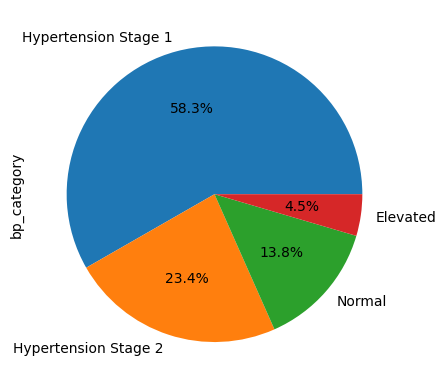

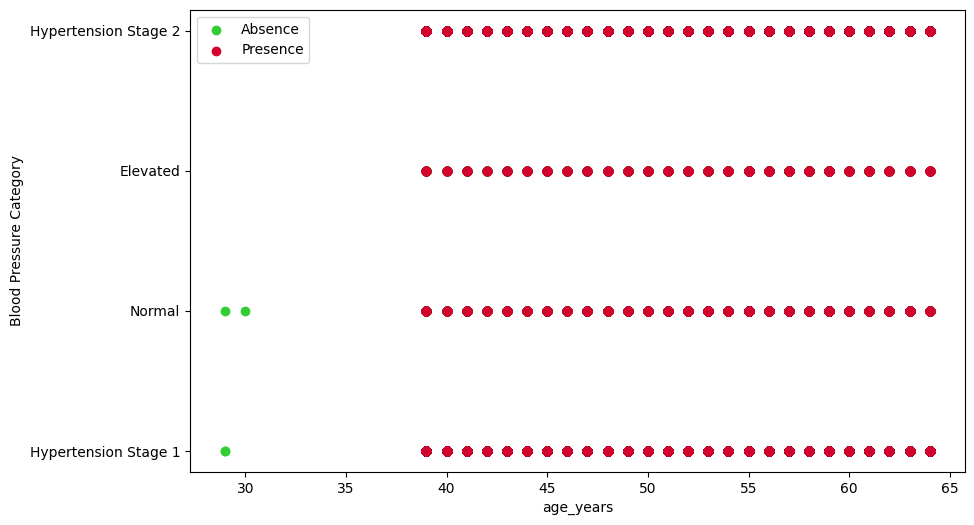

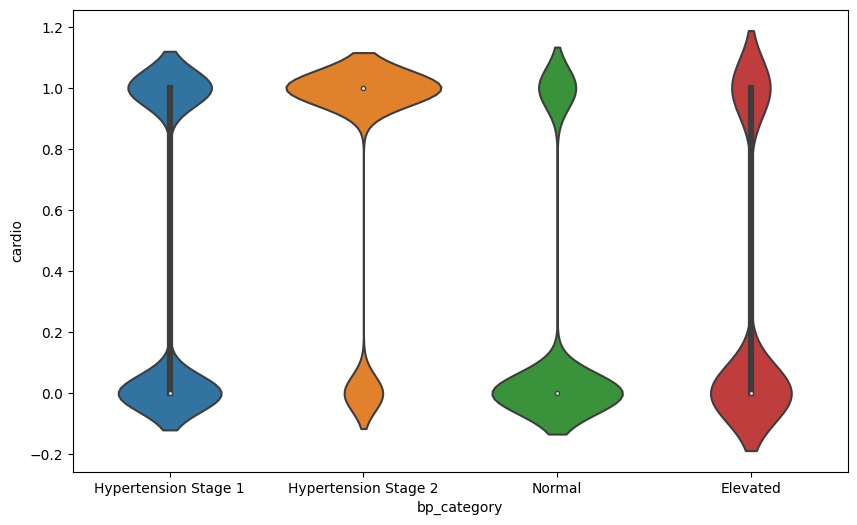

<Figure size 1000x600 with 0 Axes>

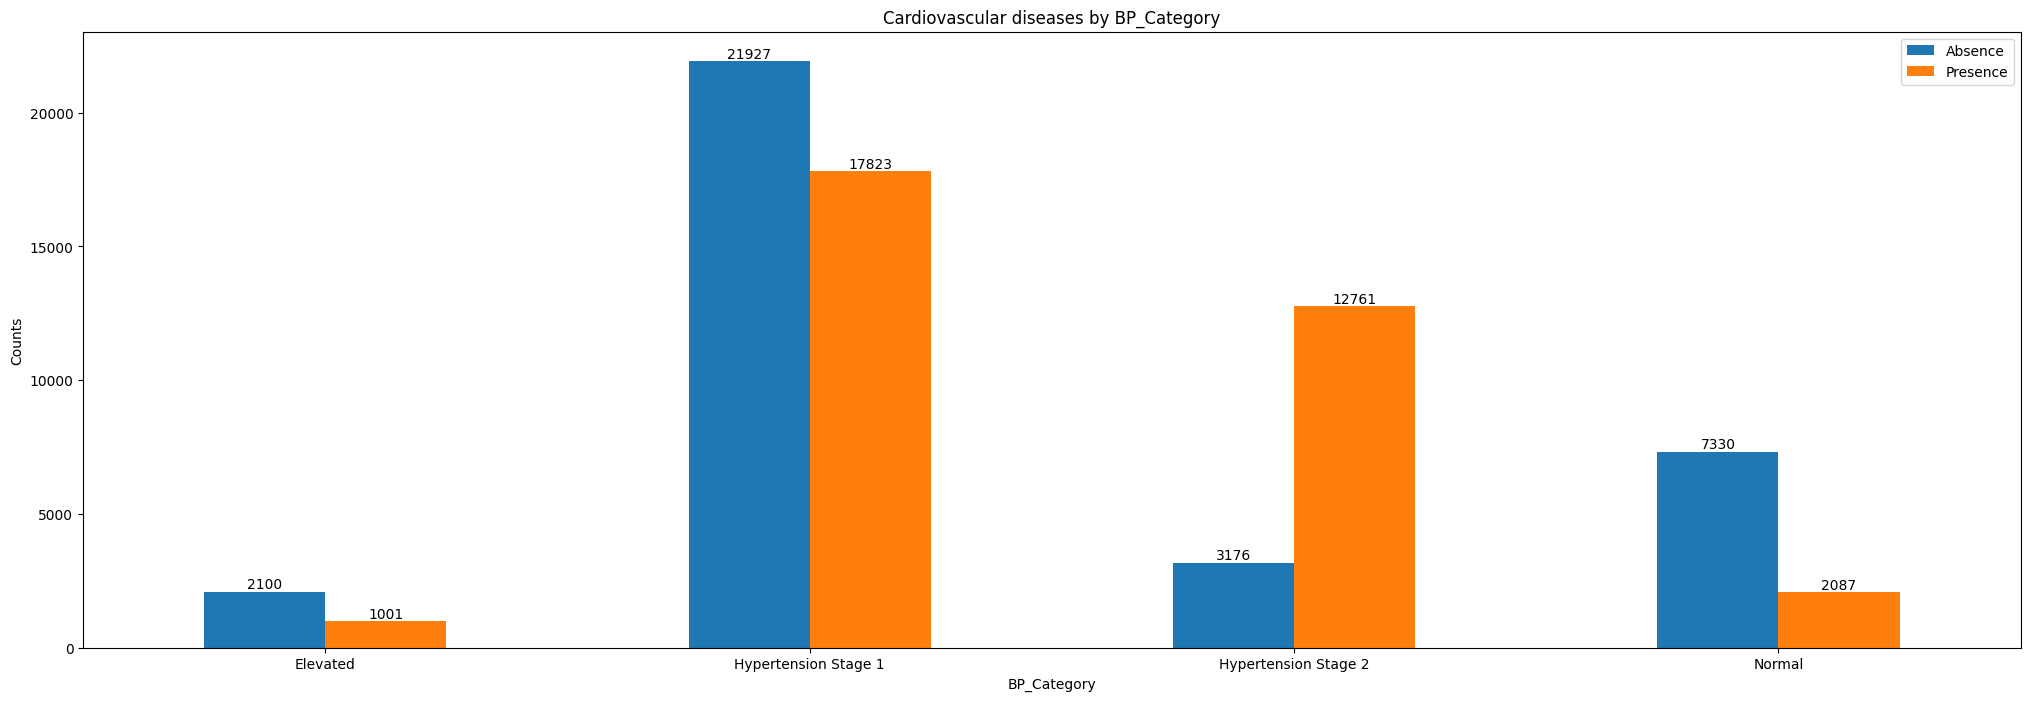

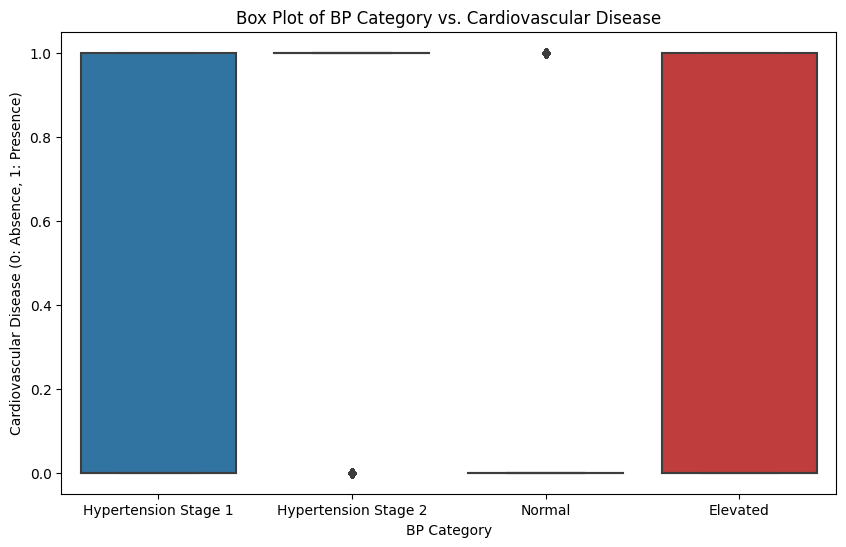

In [ ]:
#plotting a countplot of No of people in each B.P Categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='bp_category')
plt.xlabel("Blood Pressure Category")
plt.ylabel("Value Counts")
plt.title("No of people in each B.P Category")
plt.show()
df['bp_category'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(x=df.age_years[df.cardio==0], y=df.bp_category[(df.cardio==0)], c="#32CD32")
plt.scatter(x=df.age_years[df.cardio==1], y=df.bp_category[(df.cardio==1)], c="#D2042D")
plt.legend(["Absence", "Presence"])
plt.xlabel("age_years")
plt.ylabel("Blood Pressure Category")
plt.show()
# violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(y=df.cardio,x=df.bp_category,data=df)
plt.show()

plt.figure(figsize=(10, 6))
ax = pd.crosstab(df.bp_category,df.cardio).plot(kind="bar",figsize=(25,8))
plt.title('Cardiovascular diseases by BP_Category')
plt.xlabel('BP_Category')
plt.xticks(rotation=0)
plt.ylabel('Counts')
plt.legend(["Absence", "Presence"])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='bp_category', y='cardio')
plt.title('Box Plot of BP Category vs. Cardiovascular Disease')
plt.ylabel('Cardiovascular Disease (0: Absence, 1: Presence)')
plt.xlabel('BP Category')
plt.show()

In [ ]:
# sns.swarmplot(x='cardio',y='ap_hi',hue='bp_category', data=df, size=6)
# plt.xlabel('Cardiovascular Disease (0: Absence, 1: Presence)')
# plt.ylabel('Systolic blood pressure')
# plt.show()

**Describe Smoking Status**

Text(0.5, 0, '0: Non-smoker,1: Smoker')

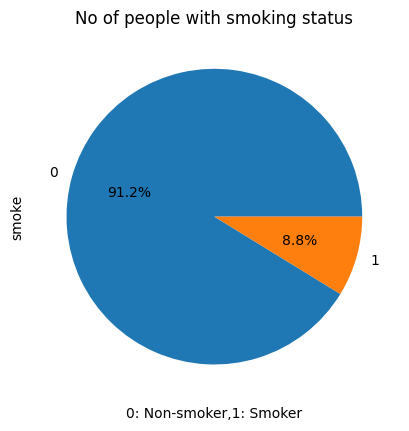

In [ ]:
#plotting a pie chart of No of people with smoking status
df['smoke'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("No of people with smoking status")
plt.xlabel('0: Non-smoker,1: Smoker')

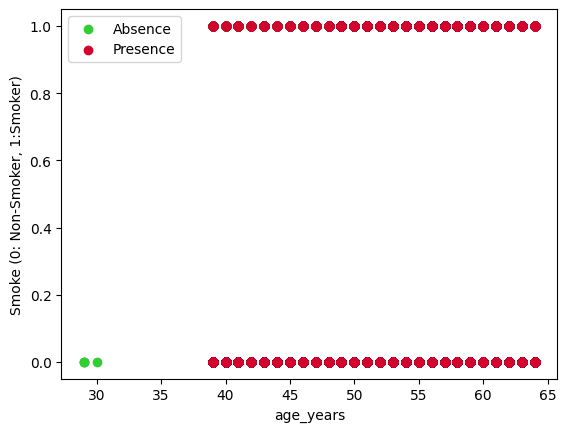

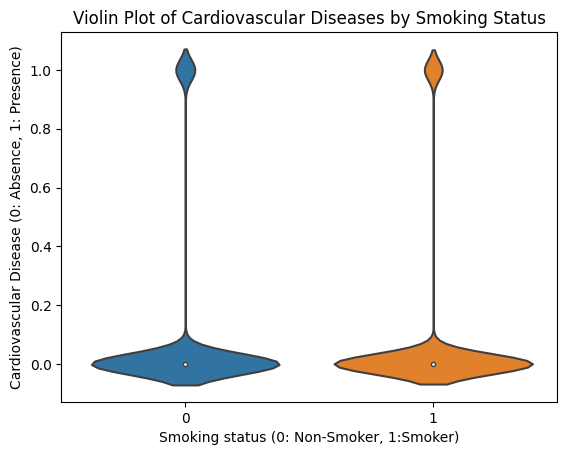

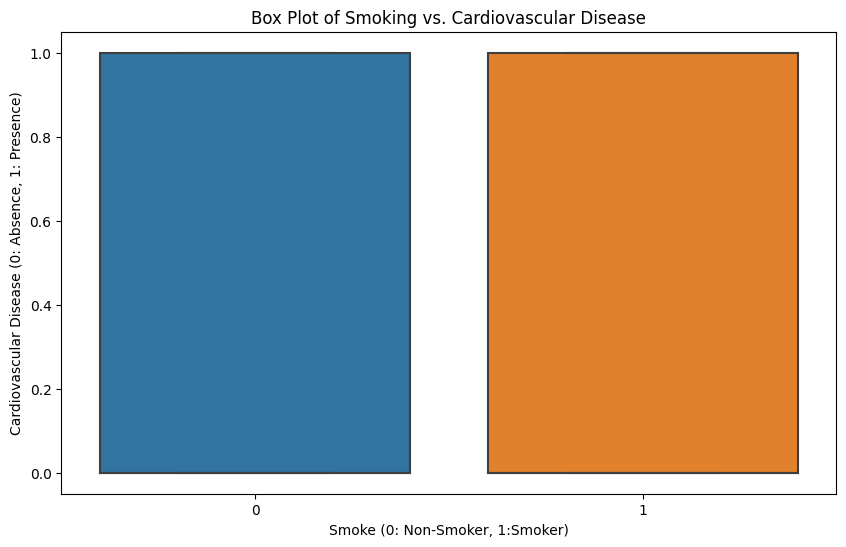

In [ ]:
plt.scatter(x=df.age_years[df.cardio==0], y=df.smoke[(df.cardio==0)], c="#32CD32")
plt.scatter(x=df.age_years[df.cardio==1], y=df.smoke[(df.cardio==1)], c="#D2042D")
plt.legend(["Absence", "Presence"])
plt.xlabel("age_years")
plt.ylabel("Smoke (0: Non-Smoker, 1:Smoker)")
plt.show()
# violinplot
sns.violinplot(x=df.cardio,y=df.smoke,data=df)
plt.title('Violin Plot of Cardiovascular Diseases by Smoking Status')
plt.ylabel('Cardiovascular Disease (0: Absence, 1: Presence)')
plt.xlabel('Smoking status (0: Non-Smoker, 1:Smoker)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='smoke', y='cardio')
plt.title('Box Plot of Smoking vs. Cardiovascular Disease')
plt.ylabel('Cardiovascular Disease (0: Absence, 1: Presence)')
plt.xlabel('Smoke (0: Non-Smoker, 1:Smoker)')
plt.show()

**Describe Alcohol Drink Status**

Text(0.5, 0, '0: Does not consume alcohol, 1: Consumes alcohol')

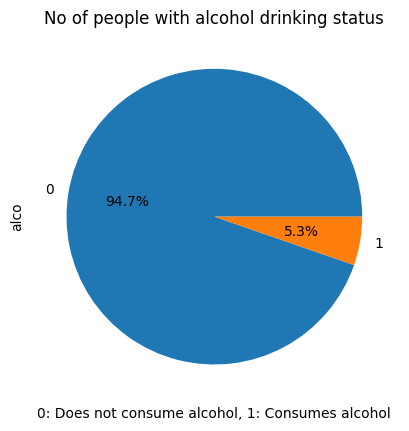

In [ ]:
#plotting a pie chart of No of people with drinking status
df['alco'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("No of people with alcohol drinking status")
plt.xlabel('0: Does not consume alcohol, 1: Consumes alcohol')

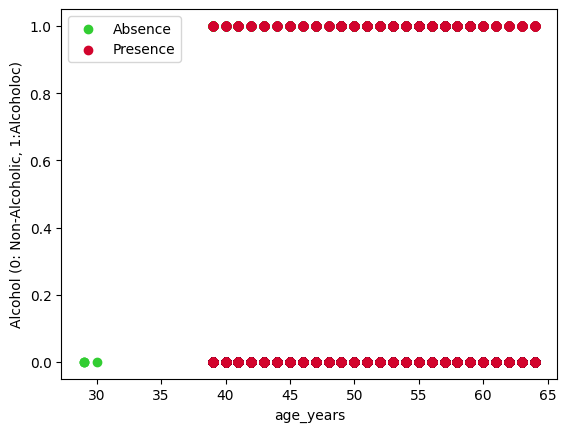

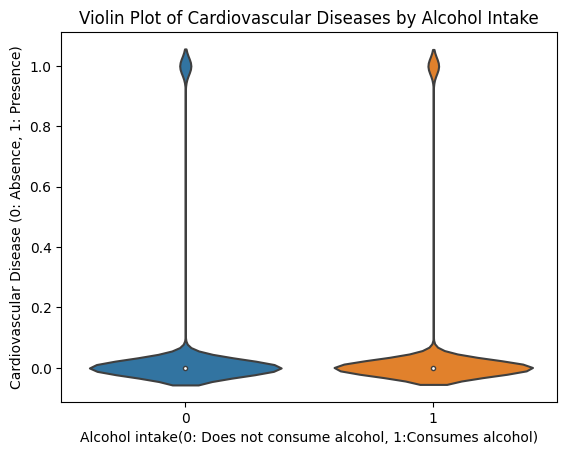

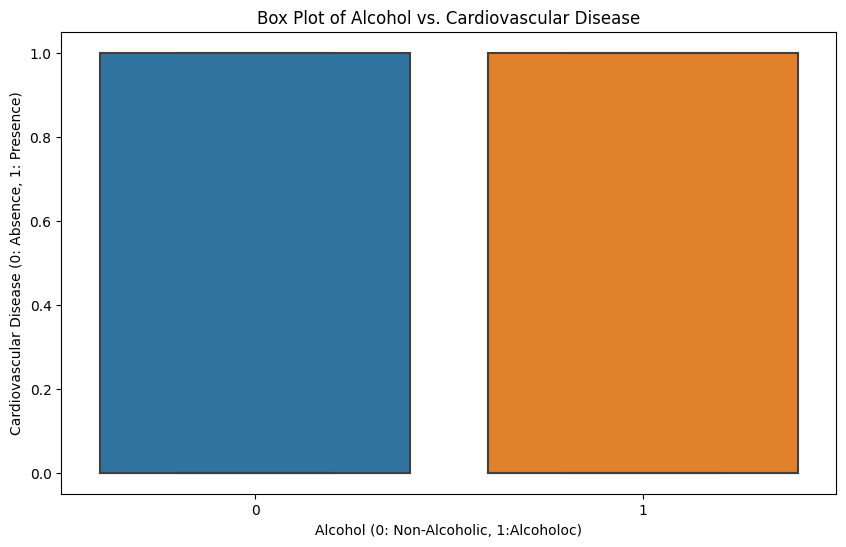

In [ ]:
plt.scatter(x=df.age_years[df.cardio==0], y=df.alco[(df.cardio==0)], c="#32CD32")
plt.scatter(x=df.age_years[df.cardio==1], y=df.alco[(df.cardio==1)], c="#D2042D")
plt.legend(["Absence", "Presence"])
plt.xlabel("age_years")
plt.ylabel("Alcohol (0: Non-Alcoholic, 1:Alcoholoc)")
plt.show()
# violinplot
sns.violinplot(x=df.cardio,y=df.alco,data=df)
plt.title('Violin Plot of Cardiovascular Diseases by Alcohol Intake')
plt.ylabel('Cardiovascular Disease (0: Absence, 1: Presence)')
plt.xlabel('Alcohol intake(0: Does not consume alcohol, 1:Consumes alcohol)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='alco', y='cardio')
plt.title('Box Plot of Alcohol vs. Cardiovascular Disease')
plt.ylabel('Cardiovascular Disease (0: Absence, 1: Presence)')
plt.xlabel('Alcohol (0: Non-Alcoholic, 1:Alcoholoc)')
plt.show()

**Desribe Cholesterol Levels**

Text(0.5, 0, 'Cholesterol Levels(1:Normal, 2:Above Normal, 3:Well Above Normal)')

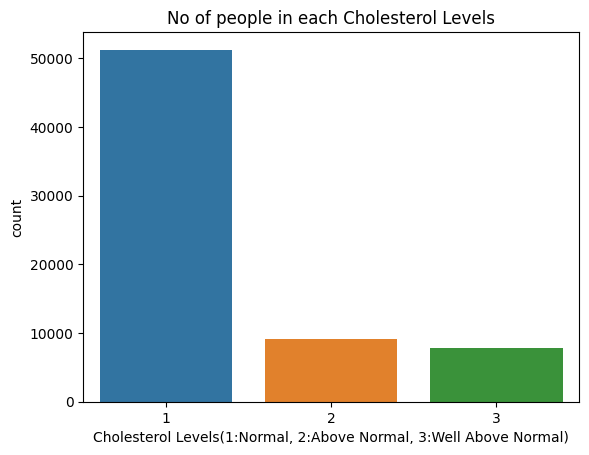

In [ ]:
#plotting a countplot of No of people with Cholesterol Levels
sns.countplot(data=df, x='cholesterol')
plt.title("No of people in each Cholesterol Levels")
plt.xlabel('Cholesterol Levels(1:Normal, 2:Above Normal, 3:Well Above Normal)')

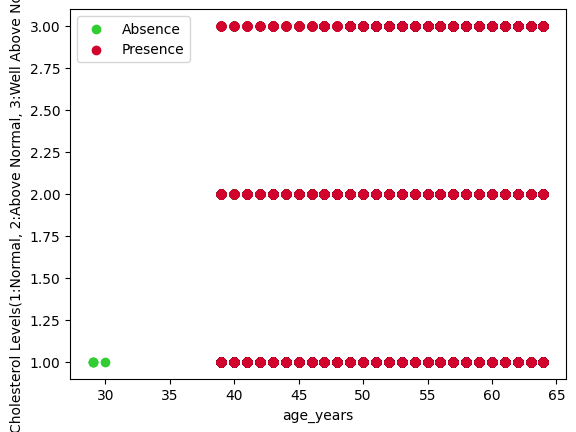

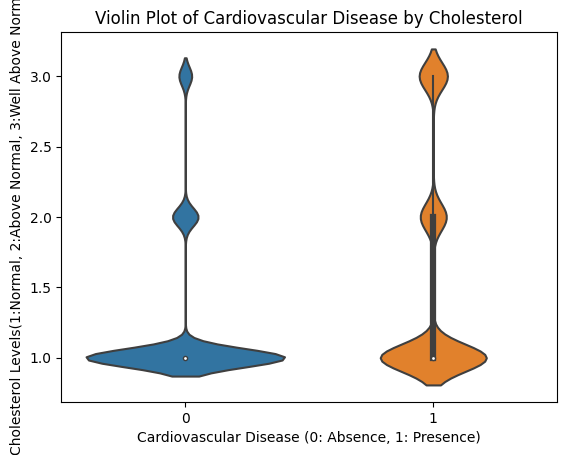

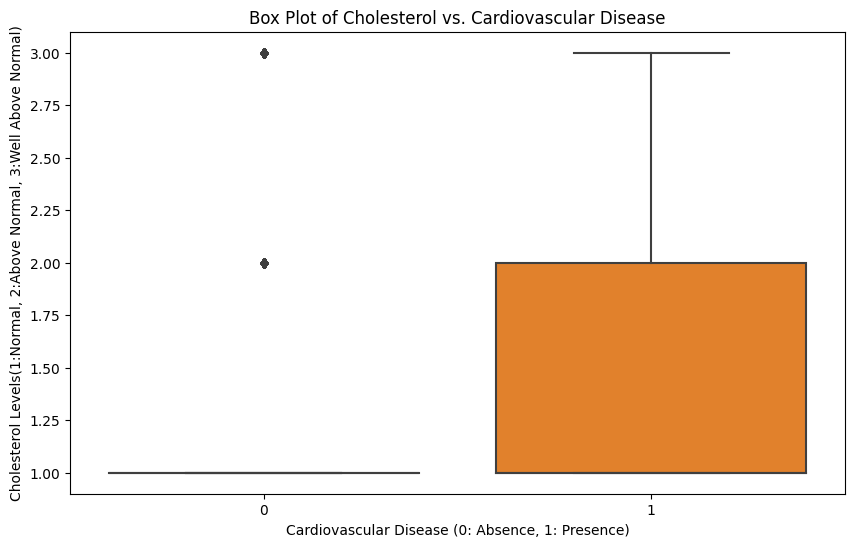

In [ ]:
plt.scatter(x=df.age_years[df.cardio==0], y=df.cholesterol[(df.cardio==0)], c="#32CD32")
plt.scatter(x=df.age_years[df.cardio==1], y=df.cholesterol[(df.cardio==1)], c="#D2042D")
plt.legend(["Absence", "Presence"])
plt.xlabel("age_years")
plt.ylabel("Cholesterol Levels(1:Normal, 2:Above Normal, 3:Well Above Normal)")
plt.show()
# violinplot
sns.violinplot(x=df.cardio,y=df.cholesterol,data=df)
plt.title('Violin Plot of Cardiovascular Disease by Cholesterol')
plt.xlabel('Cardiovascular Disease (0: Absence, 1: Presence)')
plt.ylabel('Cholesterol Levels(1:Normal, 2:Above Normal, 3:Well Above Normal)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='cholesterol', x='cardio')
plt.title('Box Plot of Cholesterol vs. Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease (0: Absence, 1: Presence)')
plt.ylabel('Cholesterol Levels(1:Normal, 2:Above Normal, 3:Well Above Normal)')
plt.show()

**Describe Glucose Levels**

Text(0.5, 0, 'Glucose Levels(1:Normal, 2:Above Normal, 3:Well Above Normal)')

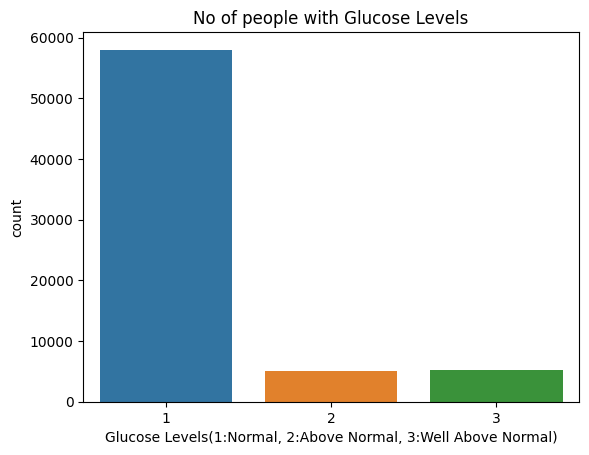

In [ ]:
#plotting a countplot of No of people with Glucose Levels
sns.countplot(data=df, x='gluc')
plt.title("No of people with Glucose Levels")
plt.xlabel('Glucose Levels(1:Normal, 2:Above Normal, 3:Well Above Normal)')

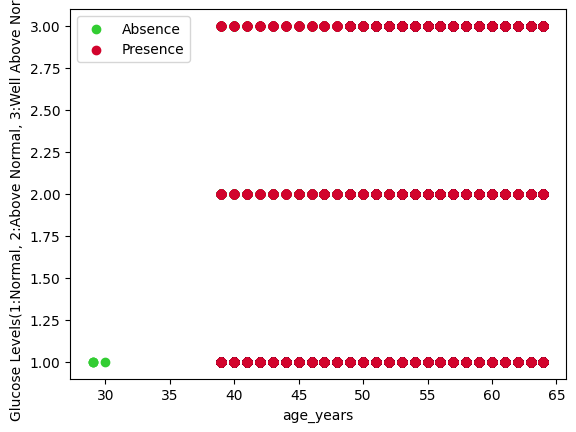

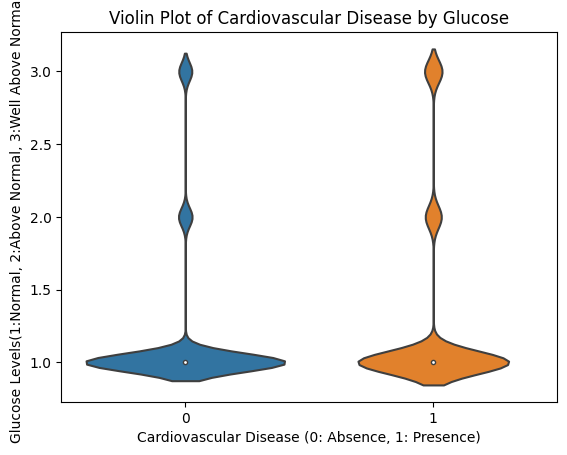

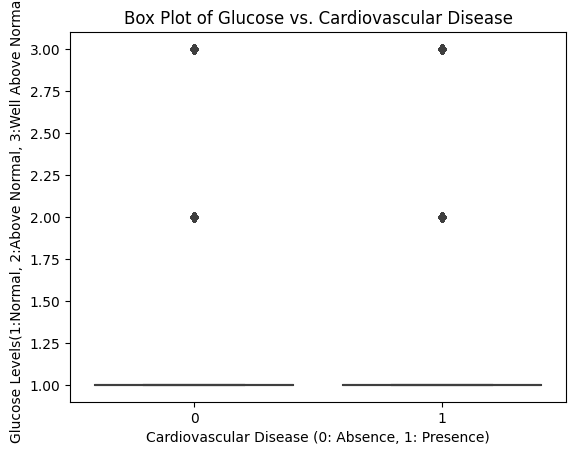

In [ ]:
plt.scatter(x=df.age_years[df.cardio==0], y=df.gluc[(df.cardio==0)], c="#32CD32")
plt.scatter(x=df.age_years[df.cardio==1], y=df.gluc[(df.cardio==1)], c="#D2042D")
plt.legend(["Absence", "Presence"])
plt.xlabel("age_years")
plt.ylabel("Glucose Levels(1:Normal, 2:Above Normal, 3:Well Above Normal)")
plt.show()
# violinplot
sns.violinplot(x=df.cardio,y=df.gluc,data=df)
plt.title('Violin Plot of Cardiovascular Disease by Glucose')
plt.xlabel('Cardiovascular Disease (0: Absence, 1: Presence)')
plt.ylabel('Glucose Levels(1:Normal, 2:Above Normal, 3:Well Above Normal)')
plt.show()

# plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cardio', y='gluc')
plt.title('Box Plot of Glucose vs. Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease (0: Absence, 1: Presence)')
plt.ylabel('Glucose Levels(1:Normal, 2:Above Normal, 3:Well Above Normal)')
plt.show()

**Describe physical activites**

Text(0.5, 0, '0: Not physically active, 1: Physically active')

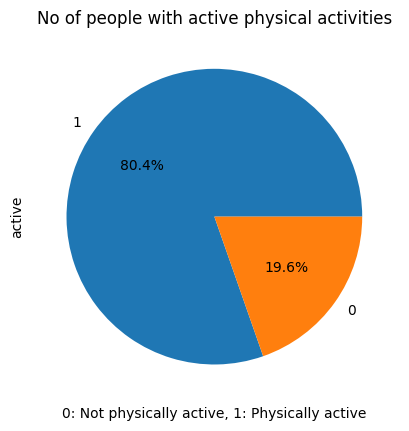

In [ ]:
#plotting a pie chart of No of people with active physical activities
df['active'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("No of people with active physical activities")
plt.xlabel('0: Not physically active, 1: Physically active')

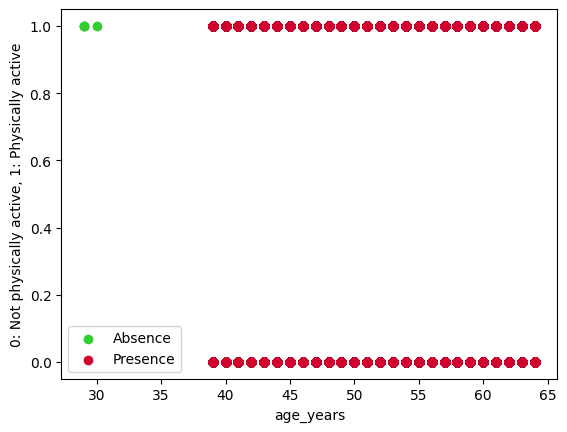

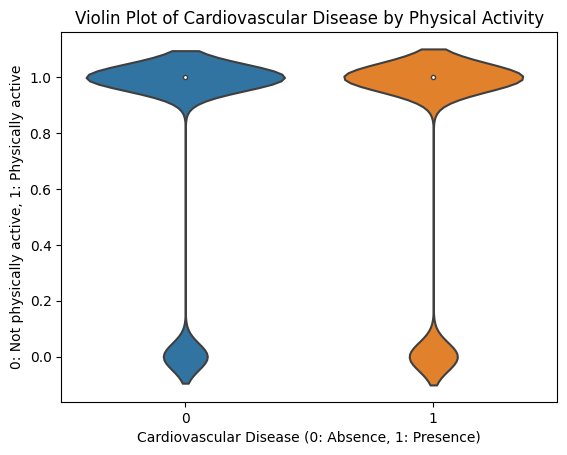

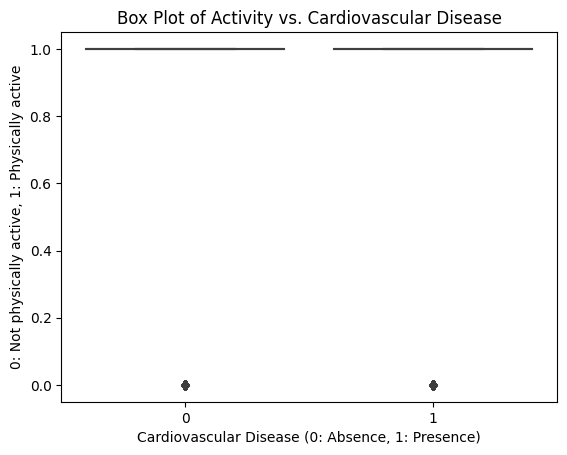

In [ ]:
plt.scatter(x=df.age_years[df.cardio==0], y=df.active[(df.cardio==0)], c="#32CD32")
plt.scatter(x=df.age_years[df.cardio==1], y=df.active[(df.cardio==1)], c="#D2042D")
plt.legend(["Absence", "Presence"])
plt.xlabel("age_years")
plt.ylabel("0: Not physically active, 1: Physically active")
plt.show()
# violinplot
sns.violinplot(x=df.cardio,y=df.active,data=df)
plt.title('Violin Plot of Cardiovascular Disease by Physical Activity')
plt.xlabel('Cardiovascular Disease (0: Absence, 1: Presence)')
plt.ylabel('0: Not physically active, 1: Physically active')
plt.show()

# plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cardio', y='active')
plt.title('Box Plot of Activity vs. Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease (0: Absence, 1: Presence)')
plt.ylabel('0: Not physically active, 1: Physically active')
plt.show()


**Describe Cardiovascular Diseases**

Absence: 34533
Absence Percentage: 50.63%
Presence: 33672
Presence Percentage: 49.37%


Text(0, 0.5, '')

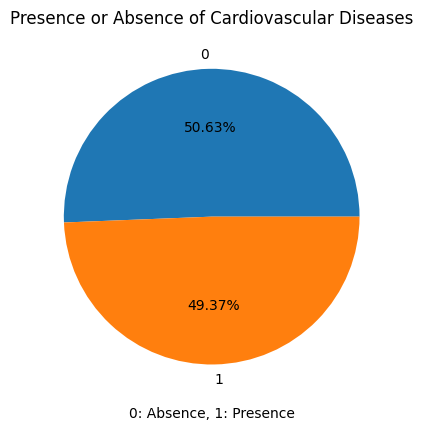

In [ ]:

# Gender of the patient. Categorical variable (0: Absence, 1: Presence).
# absence
cardio_absence = df['cardio'].value_counts()[0]
print(f"Absence: {cardio_absence}")
print("Absence Percentage: {:.2f}%".format((len(df[df.cardio == 0]) / (len(df.cardio))*100)))
# presence
cardio_presence = df['cardio'].value_counts()[1]
print(f"Presence: {cardio_presence}")
print("Presence Percentage: {:.2f}%".format((len(df[df.cardio == 1]) / (len(df.cardio))*100)))

#plotting a pie chart of No of people with persense or absense of cardiovascular diseases
df['cardio'].value_counts().plot(kind='pie',autopct='%2.2f%%')
plt.title("Presence or Absence of Cardiovascular Diseases")
plt.xlabel('0: Absence, 1: Presence')
plt.ylabel('')

**Describe Age vs Cardiovascular Disease**

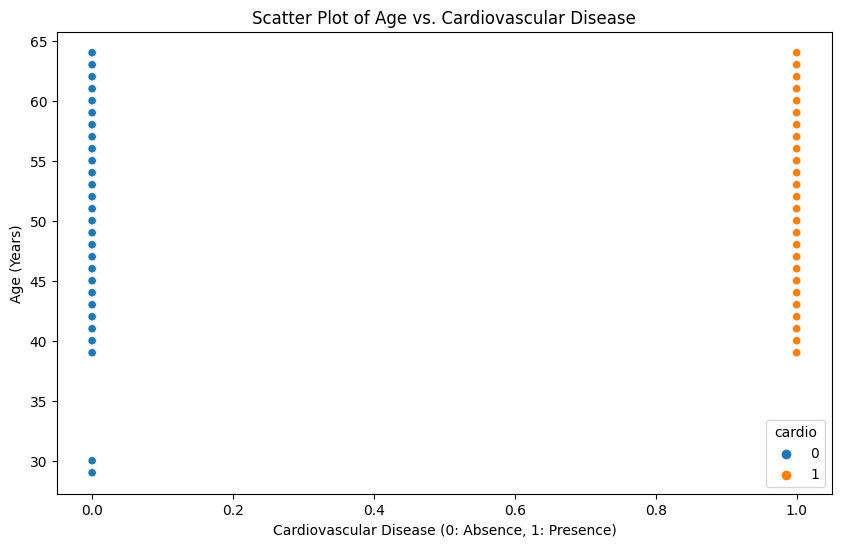

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='cardio', y='age_years', hue='cardio')
plt.title('Scatter Plot of Age vs. Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease (0: Absence, 1: Presence)')
plt.ylabel('Age (Years)')
plt.show()

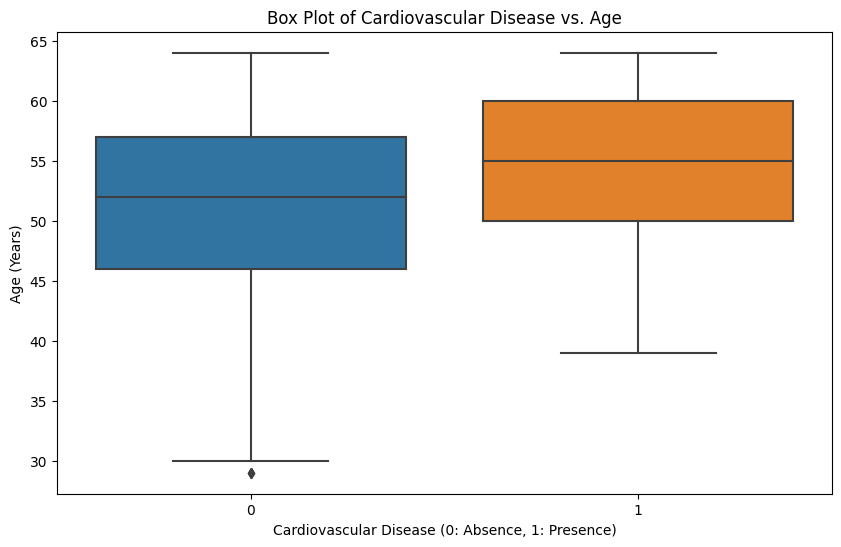

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cardio', y='age_years')
plt.title('Box Plot of Cardiovascular Disease vs. Age')
plt.xlabel('Cardiovascular Disease (0: Absence, 1: Presence)')
plt.ylabel('Age (Years)')
plt.show()

**Cardio vs Age vs ap_lo**

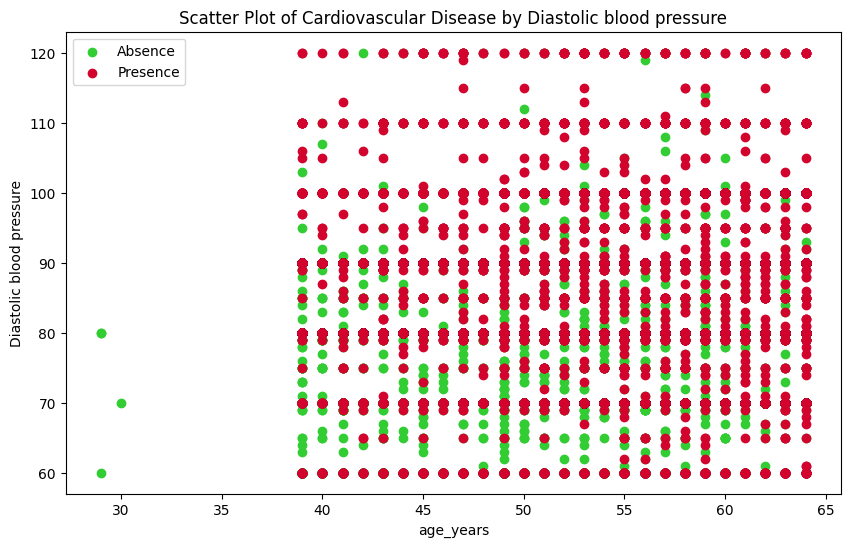

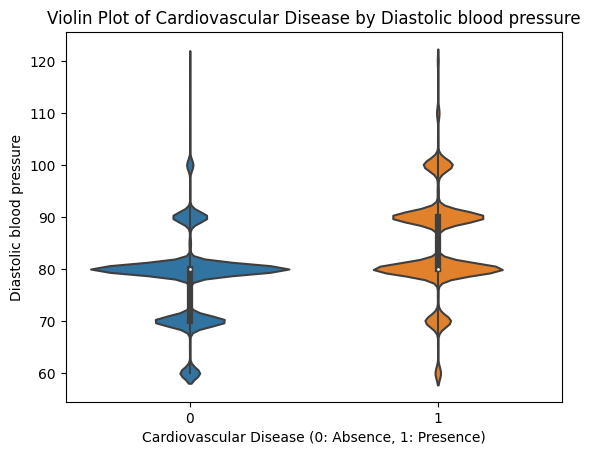

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df.age_years[df.cardio==0], y=df.ap_lo[(df.cardio==0)], c="#32CD32")
plt.scatter(x=df.age_years[df.cardio==1], y=df.ap_lo[(df.cardio==1)], c="#D2042D")
plt.legend(["Absence", "Presence"])
plt.title('Scatter Plot of Cardiovascular Disease by Diastolic blood pressure')
plt.xlabel("age_years")
plt.ylabel("Diastolic blood pressure")
plt.show()
# violinplot
sns.violinplot(x=df.cardio,y=df.ap_lo,data=df)
plt.title('Violin Plot of Cardiovascular Disease by Diastolic blood pressure')
plt.xlabel('Cardiovascular Disease (0: Absence, 1: Presence)')
plt.ylabel('Diastolic blood pressure')
plt.show()

**Cardio vs age vs ap_hi**

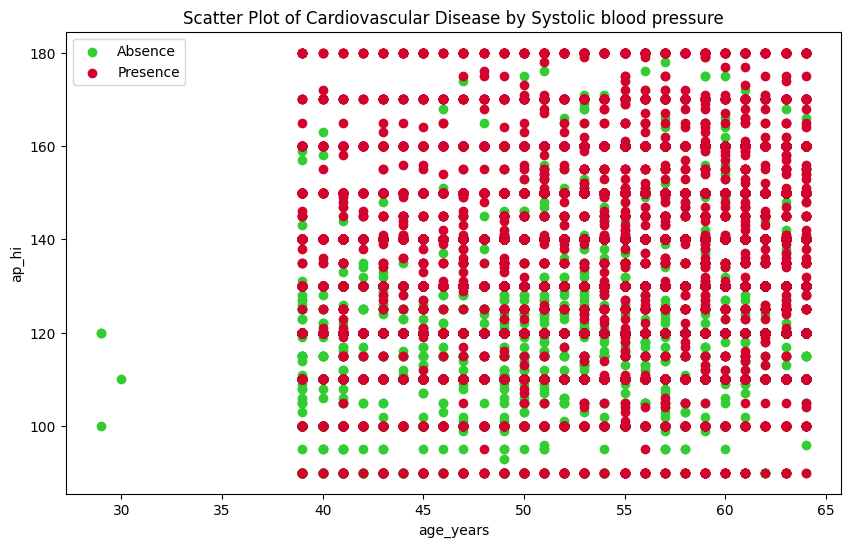

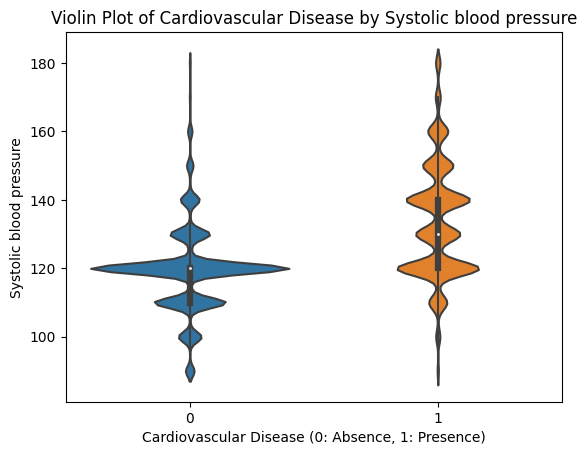

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df.age_years[df.cardio==0], y=df.ap_hi[(df.cardio==0)], c="#32CD32")
plt.scatter(x=df.age_years[df.cardio==1], y=df.ap_hi[(df.cardio==1)], c="#D2042D")
plt.legend(["Absence", "Presence"])
plt.title('Scatter Plot of Cardiovascular Disease by Systolic blood pressure')
plt.xlabel("age_years")
plt.ylabel("ap_hi")
plt.show()
# violinplot
sns.violinplot(x=df.cardio,y=df.ap_hi,data=df)
plt.title('Violin Plot of Cardiovascular Disease by Systolic blood pressure')
plt.xlabel('Cardiovascular Disease (0: Absence, 1: Presence)')
plt.ylabel('Systolic blood pressure')
plt.show()

**Describe Diastolic Blood Pressure vs Cardiovascular Disease**

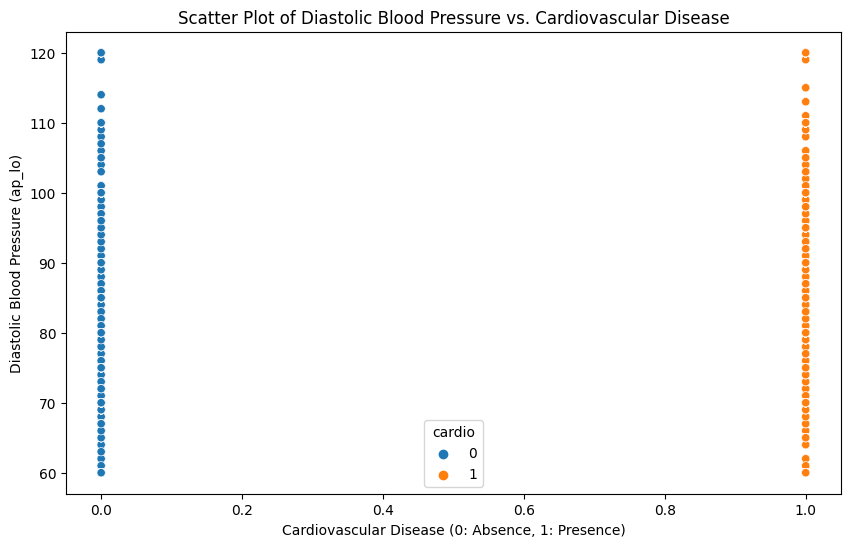

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='cardio', y='ap_lo', hue='cardio')
plt.title('Scatter Plot of Diastolic Blood Pressure vs. Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease (0: Absence, 1: Presence)')
plt.ylabel('Diastolic Blood Pressure (ap_lo)')
plt.show()

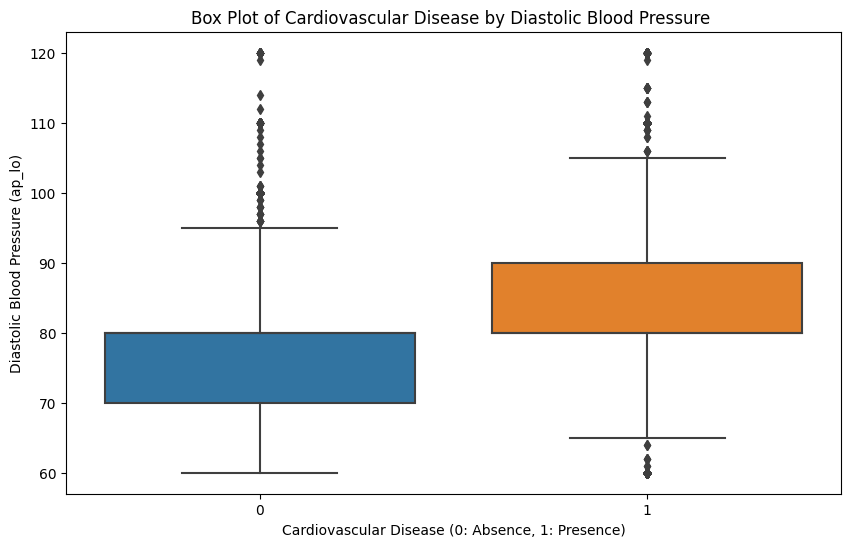

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cardio', y='ap_lo')
plt.title('Box Plot of Cardiovascular Disease by Diastolic Blood Pressure ')
plt.xlabel('Cardiovascular Disease (0: Absence, 1: Presence)')
plt.ylabel('Diastolic Blood Pressure (ap_lo)')
plt.show()

**Describe Systolic Blood Pressure vs Cardiovascular Disease**

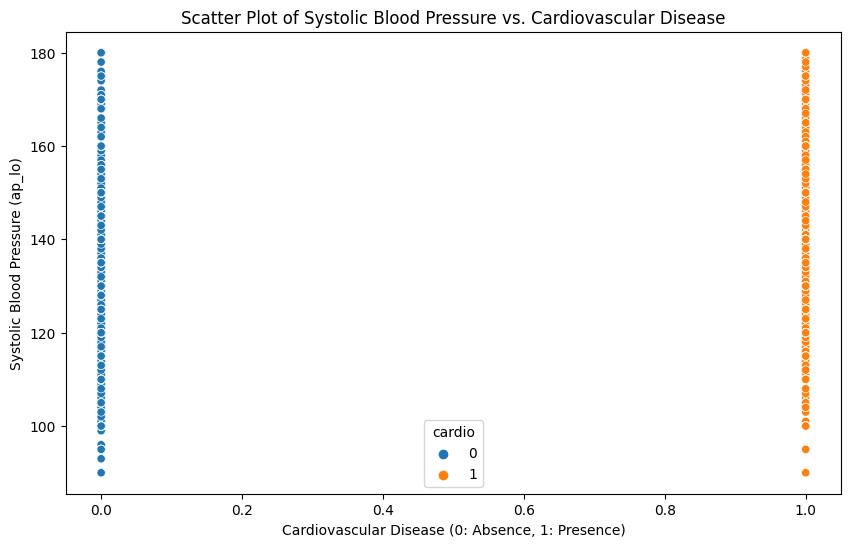

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='cardio', y='ap_hi', hue='cardio')
plt.title('Scatter Plot of Systolic Blood Pressure vs. Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease (0: Absence, 1: Presence)')
plt.ylabel('Systolic Blood Pressure (ap_lo)')
plt.show()

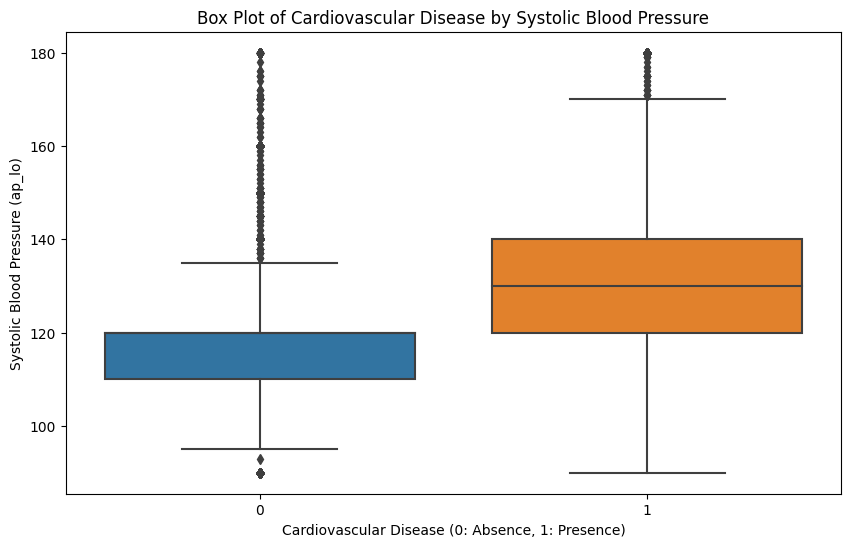

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cardio', y='ap_hi')
plt.title('Box Plot of Cardiovascular Disease by Systolic Blood Pressure')
plt.xlabel('Cardiovascular Disease (0: Absence, 1: Presence)')
plt.ylabel('Systolic Blood Pressure (ap_lo)')
plt.show()

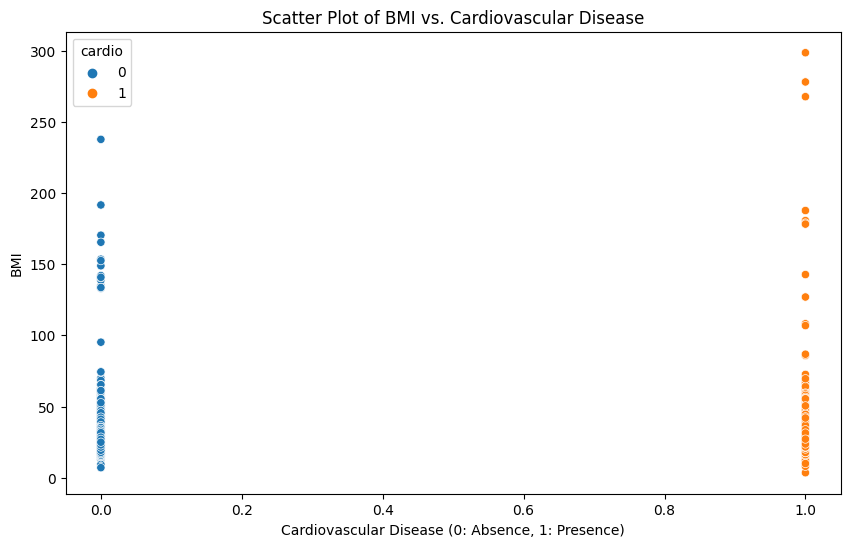

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='cardio', y='bmi', hue='cardio')
plt.title('Scatter Plot of BMI vs. Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease (0: Absence, 1: Presence)')
plt.ylabel('BMI')
plt.show()

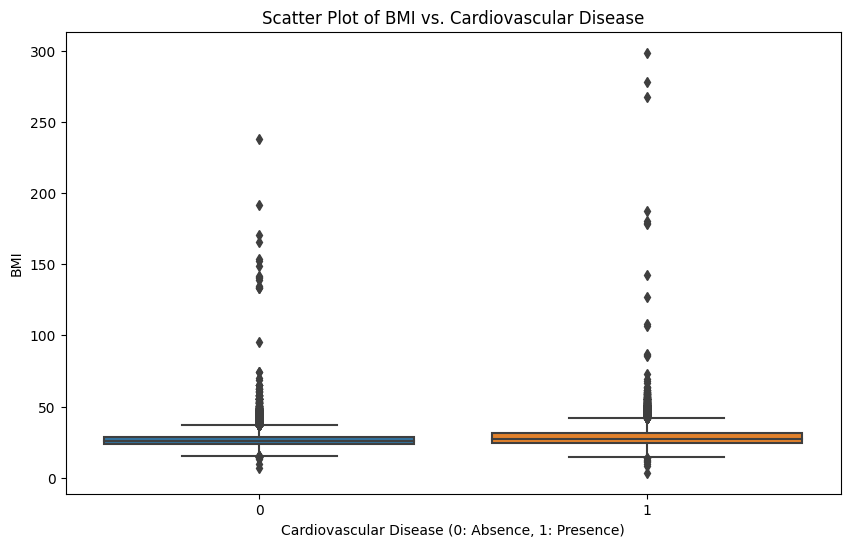

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cardio', y='bmi')
plt.title('Scatter Plot of BMI vs. Cardiovascular Disease')
plt.xlabel('Cardiovascular Disease (0: Absence, 1: Presence)')
plt.ylabel('BMI')
plt.show()

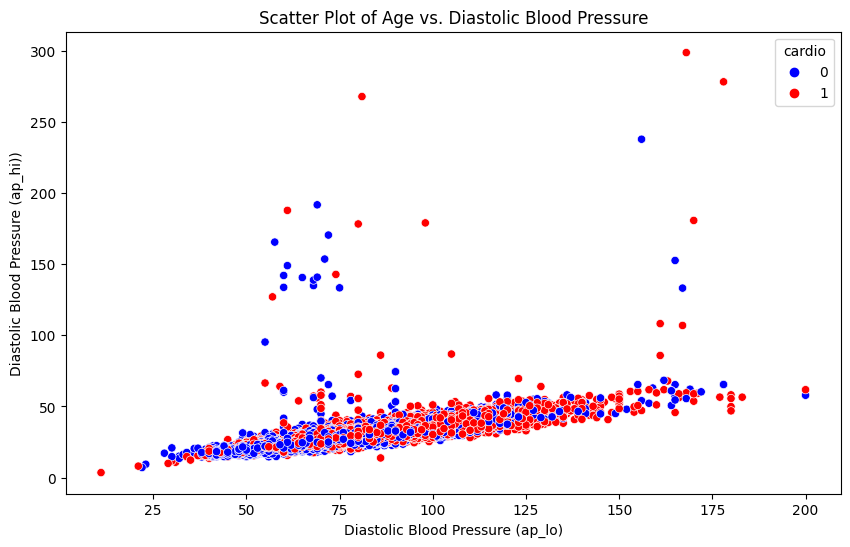

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='weight', y='bmi', hue='cardio', palette={0: 'blue', 1: 'red'})
plt.title('Scatter Plot of Age vs. Diastolic Blood Pressure')
plt.xlabel('Diastolic Blood Pressure (ap_lo)')
plt.ylabel('Diastolic Blood Pressure (ap_hi))')
plt.show()

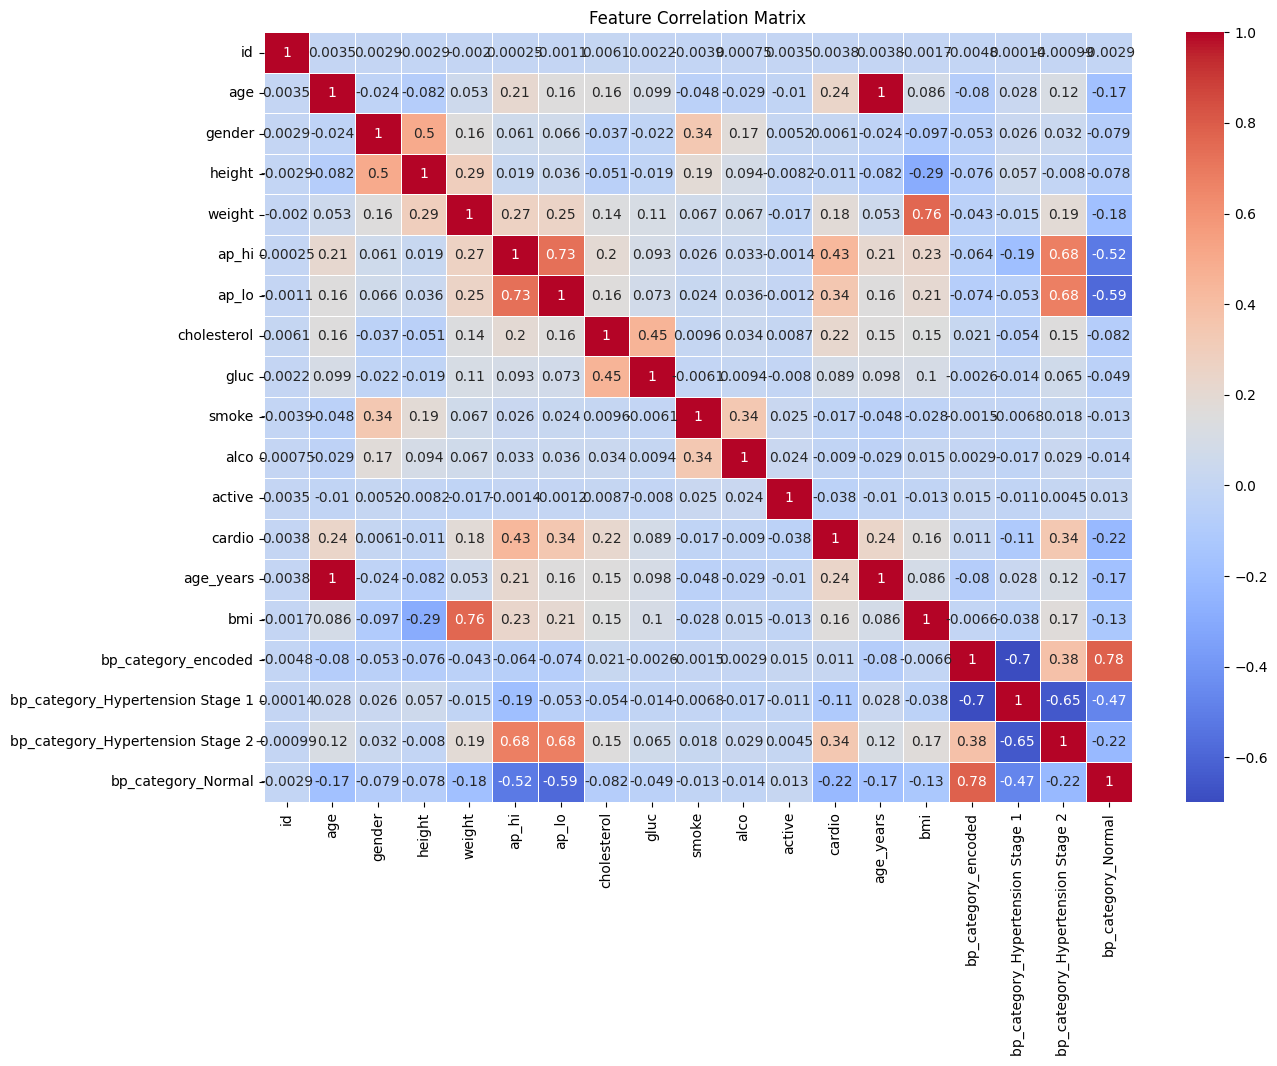

In [ ]:
# Correlation Analysis
data_corr = df_bp.copy()

for column in data_corr.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_corr[column] = le.fit_transform(data_corr[column])

correlation_matrix = data_corr.corr()
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

**Assignment 2**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.preprocessing import MaxAbsScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,InputLayer
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score,average_precision_score

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Declare Data Path

directory_path = "/content/gdrive/MyDrive/WQD7001-Principle Of Data Science"
cardio_data_csv = "cardio_data_processed.csv"
cardiao_data_path = os.path.join(directory_path,cardio_data_csv)
print(f"Data Path: {cardiao_data_path}")

Data Path: /content/gdrive/MyDrive/WQD7001-Principle Of Data Science/cardio_data_processed.csv


In [ ]:
# Load CSV
df = pd.read_csv(cardiao_data_path)

**Data Preprocessing 1**

In [ ]:
df = df.drop('bp_category',axis=1)
df = df.drop('id',axis=1)

In [ ]:
bp_categories = ['Normal','Elevated','Hypertension Stage 1','Hypertension Stage 2']
enc = OrdinalEncoder()
df['bp_category_encoded']=enc.fit_transform(df[['bp_category_encoded']])
df['bp_category_encoded']=df['bp_category_encoded'].apply(lambda x: int(x))

In [ ]:
X = df.drop('bp_category_encoded',axis=1)
y = df['bp_category_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((54564, 14), (13641, 14), (54564,), (13641,))

In [ ]:
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
print(X_train)

[[0.96933798 1.         0.57948718 ... 1.         0.97142857 0.0818587 ]
 [0.92055749 0.         0.54871795 ... 0.         0.94285714 0.08117708]
 [0.4253194  0.         0.5025641  ... 0.         0.42857143 0.05770137]
 ...
 [0.8097561  0.         0.54871795 ... 0.         0.82857143 0.07007614]
 [0.86171119 0.         0.53846154 ... 1.         0.88571429 0.09674784]
 [0.86054975 1.         0.63589744 ... 1.         0.88571429 0.07070592]]


**Simple ANN Model 1**

In [ ]:
#create model
model = Sequential([
    InputLayer(input_shape=14),
    Dense(14,activation='relu'),
    Dense(14,activation='relu'),
    Dense(4, activation='softmax'),
])

#compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(X_train,y_train,
                   epochs=25,
                   validation_data=[X_test,y_test])

Epoch 1/25
1706/1706 [==============================] - 8s 4ms/step - loss: 0.5649 - accuracy: 0.7928 - val_loss: 0.3121 - val_accuracy: 0.9153
Epoch 2/25
1706/1706 [==============================] - 7s 4ms/step - loss: 0.2827 - accuracy: 0.9119 - val_loss: 0.2801 - val_accuracy: 0.9245
Epoch 3/25
1706/1706 [==============================] - 13s 8ms/step - loss: 0.2538 - accuracy: 0.9174 - val_loss: 0.2507 - val_accuracy: 0.9232
Epoch 4/25
1706/1706 [==============================] - 11s 6ms/step - loss: 0.2274 - accuracy: 0.9159 - val_loss: 0.2211 - val_accuracy: 0.9211
Epoch 5/25
1706/1706 [==============================] - 7s 4ms/step - loss: 0.1996 - accuracy: 0.9212 - val_loss: 0.1911 - val_accuracy: 0.9180
Epoch 6/25
1706/1706 [==============================] - 8s 4ms/step - loss: 0.1749 - accuracy: 0.9302 - val_loss: 0.1679 - val_accuracy: 0.9433
Epoch 7/25
1706/1706 [==============================] - 8s 5ms/step - loss: 0.1499 - accuracy: 0.9469 - val_loss: 0.1430 - val_accurac

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                210       
                                                                 
 dense_1 (Dense)             (None, 14)                210       
                                                                 
 dense_2 (Dense)             (None, 4)                 60        
                                                                 
Total params: 480 (1.88 KB)
Trainable params: 480 (1.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


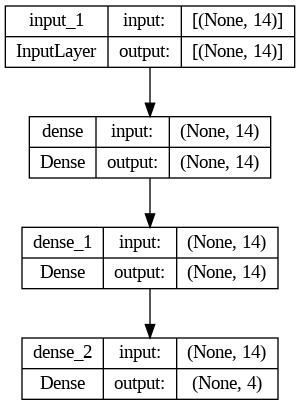

In [ ]:
model.summary()
plot_model(model,show_shapes=True)


<Axes: title={'center': 'Accuracy curve'}>

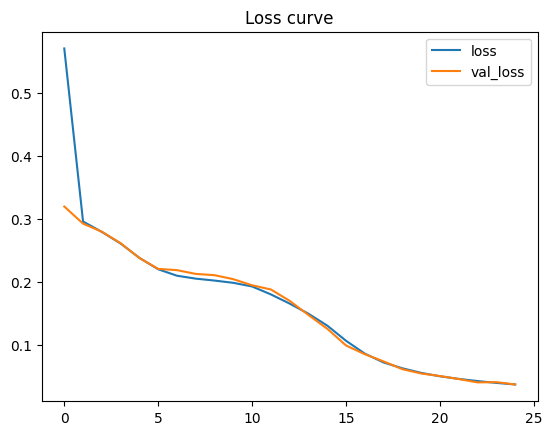

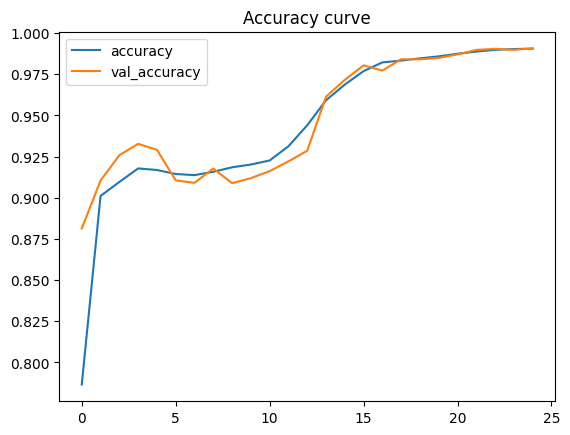

In [ ]:
#checking model training loss history
loss=history.history['loss']
val_loss=history.history['val_loss']
losses = pd.DataFrame({'loss':loss,'val_loss':val_loss})

#checking model training accuracy history
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
acc = pd.DataFrame({'accuracy':accuracy,'val_accuracy':val_accuracy})


losses.plot(title='Loss curve')
acc.plot(title='Accuracy curve')

In [ ]:
#Evaluating using model.evaluate
loss,acc = model.evaluate(X_test,y_test)
print(f"Model loss: {loss:.3f}")
print(f"Model accuracy: {acc*100:.2f}%")

427/427 [==============================] - 1s 3ms/step - loss: 0.0366 - accuracy: 0.9906
Model loss: 0.037
Model accuracy: 99.06%


In [ ]:
y_probs = model.predict(X_test)
y_preds = tf.argmax(y_probs,axis=1)

427/427 [==============================] - 1s 2ms/step


In [ ]:
acc_score=accuracy_score(y_test,y_preds)

print(classification_report(y_test,y_preds))
print(f'Accuracy is {acc_score*100:.2f}%')

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       598
           1       0.99      0.99      0.99      7924
           2       0.99      0.99      0.99      3225
           3       1.00      0.99      1.00      1894

    accuracy                           0.99     13641
   macro avg       0.99      0.98      0.98     13641
weighted avg       0.99      0.99      0.99     13641

Accuracy is 99.06%


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Elevated'),
  Text(2, 0, 'Hypertension Stage 1'),
  Text(3, 0, 'Hypertension Stage 2')])

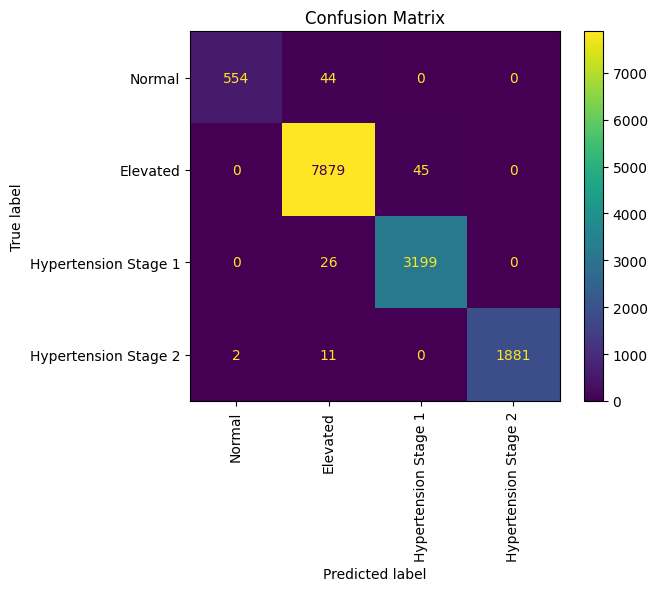

In [ ]:
#Making Confusion Matrix
cm = confusion_matrix(y_test,y_preds)

#using ConfusionMatrixDisplay to output a good confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=bp_categories)
disp.plot()
plt.title("Confusion Matrix")
plt.xticks(rotation=90)

**Simple ANN Model 2**

Epoch 1/25
1706/1706 [==============================] - 9s 4ms/step - loss: 0.4766 - accuracy: 0.8292 - val_loss: 0.3008 - val_accuracy: 0.9059
Epoch 2/25
1706/1706 [==============================] - 7s 4ms/step - loss: 0.2776 - accuracy: 0.9145 - val_loss: 0.2630 - val_accuracy: 0.9266
Epoch 3/25
1706/1706 [==============================] - 8s 5ms/step - loss: 0.2265 - accuracy: 0.9273 - val_loss: 0.2023 - val_accuracy: 0.9308
Epoch 4/25
1706/1706 [==============================] - 6s 4ms/step - loss: 0.1426 - accuracy: 0.9617 - val_loss: 0.0992 - val_accuracy: 0.9743
Epoch 5/25
1706/1706 [==============================] - 7s 4ms/step - loss: 0.0701 - accuracy: 0.9830 - val_loss: 0.0721 - val_accuracy: 0.9842
Epoch 6/25
1706/1706 [==============================] - 7s 4ms/step - loss: 0.0475 - accuracy: 0.9882 - val_loss: 0.0477 - val_accuracy: 0.9894
Epoch 7/25
1706/1706 [==============================] - 7s 4ms/step - loss: 0.0393 - accuracy: 0.9902 - val_loss: 0.0363 - val_accuracy:

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Elevated'),
  Text(2, 0, 'Hypertension Stage 1'),
  Text(3, 0, 'Hypertension Stage 2')])

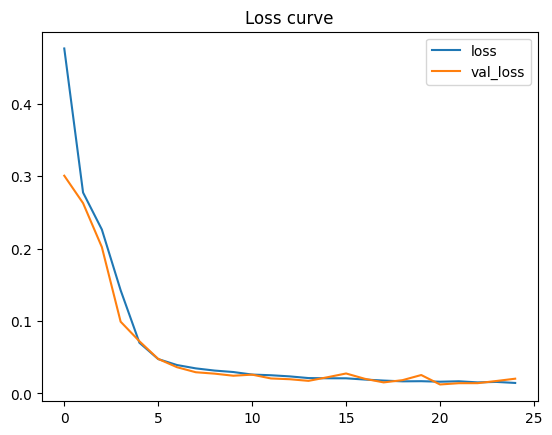

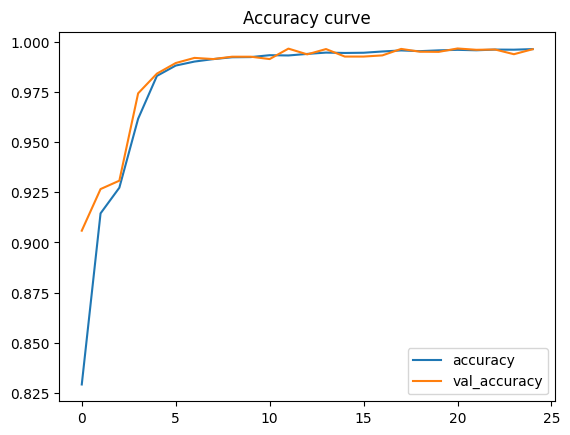

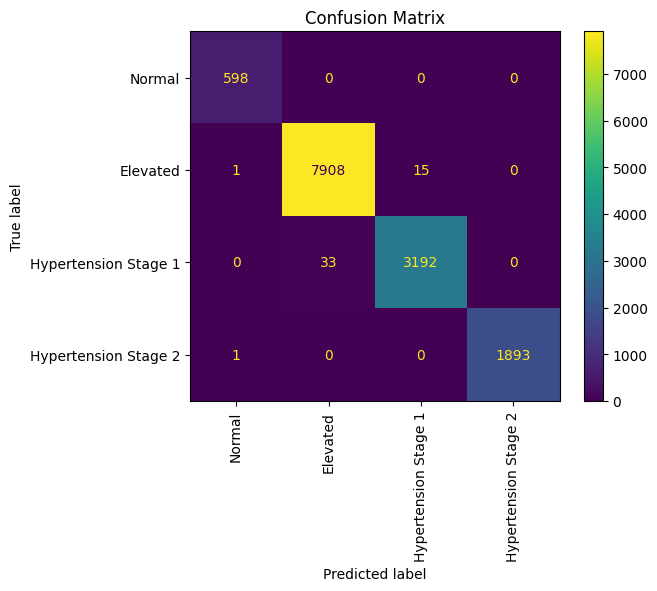

In [ ]:
#create model
model = Sequential([
    InputLayer(input_shape=14),
    Dense(14,activation='relu'),
    Dense(28,activation='relu'),
    Dense(14,activation='relu'),
    Dense(4, activation='softmax'),
])

#compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(X_train,y_train,
                   epochs=25,
                   validation_data=[X_test,y_test])

model.summary()
plot_model(model,show_shapes=True)
#checking model training loss history
loss=history.history['loss']
val_loss=history.history['val_loss']
losses = pd.DataFrame({'loss':loss,'val_loss':val_loss})

#checking model training accuracy history
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
acc = pd.DataFrame({'accuracy':accuracy,'val_accuracy':val_accuracy})


losses.plot(title='Loss curve')
acc.plot(title='Accuracy curve')
loss,acc = model.evaluate(X_test,y_test)
print(f"Model loss: {loss:.3f}")
print(f"Model accuracy: {acc*100:.2f}%")
y_probs = model.predict(X_test)
y_preds = tf.argmax(y_probs,axis=1)
acc_score=accuracy_score(y_test,y_preds)

print(classification_report(y_test,y_preds))
print(f'Accuracy is {acc_score*100:.2f}%')

#Making Confusion Matrix
cm = confusion_matrix(y_test,y_preds)

#using ConfusionMatrixDisplay to output a good confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=bp_categories)
disp.plot()
plt.title("Confusion Matrix")
plt.xticks(rotation=90)

**Simple ANN Model 3**

Epoch 1/25
1706/1706 [==============================] - 9s 4ms/step - loss: 0.4499 - accuracy: 0.8362 - val_loss: 0.2950 - val_accuracy: 0.9012
Epoch 2/25
1706/1706 [==============================] - 7s 4ms/step - loss: 0.2793 - accuracy: 0.9139 - val_loss: 0.2770 - val_accuracy: 0.9246
Epoch 3/25
1706/1706 [==============================] - 7s 4ms/step - loss: 0.2616 - accuracy: 0.9166 - val_loss: 0.2517 - val_accuracy: 0.8985
Epoch 4/25
1706/1706 [==============================] - 8s 4ms/step - loss: 0.2237 - accuracy: 0.9168 - val_loss: 0.2140 - val_accuracy: 0.9023
Epoch 5/25
1706/1706 [==============================] - 7s 4ms/step - loss: 0.1954 - accuracy: 0.9235 - val_loss: 0.1885 - val_accuracy: 0.9151
Epoch 6/25
1706/1706 [==============================] - 8s 4ms/step - loss: 0.1718 - accuracy: 0.9357 - val_loss: 0.1572 - val_accuracy: 0.9355
Epoch 7/25
1706/1706 [==============================] - 10s 6ms/step - loss: 0.1366 - accuracy: 0.9539 - val_loss: 0.1198 - val_accuracy

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Elevated'),
  Text(2, 0, 'Hypertension Stage 1'),
  Text(3, 0, 'Hypertension Stage 2')])

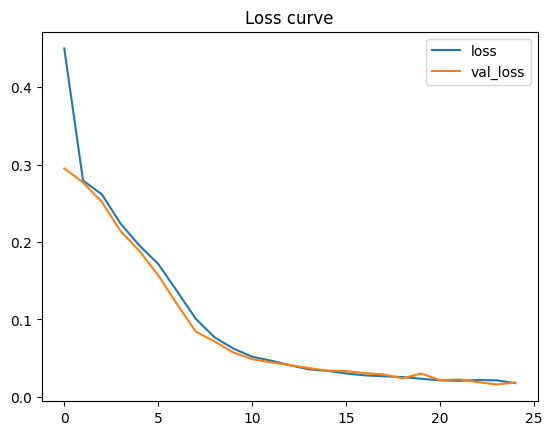

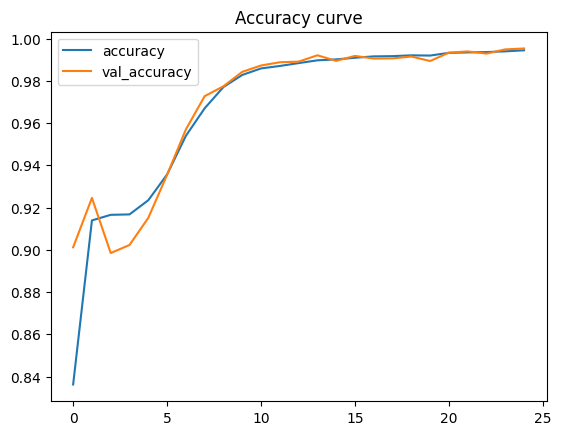

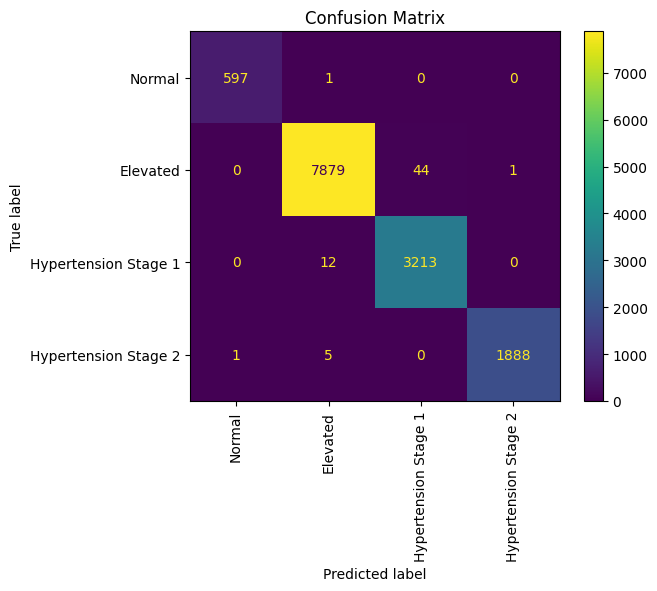

In [ ]:
#create model
model = Sequential([
    InputLayer(input_shape=14),
    Dense(14,activation='relu'),
    Dense(14,activation='relu'),
    Dense(14,activation='relu'),
    Dense(4, activation='softmax'),
])

#compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(X_train,y_train,
                   epochs=25,
                   validation_data=[X_test,y_test])

model.summary()
plot_model(model,show_shapes=True)
#checking model training loss history
loss=history.history['loss']
val_loss=history.history['val_loss']
losses = pd.DataFrame({'loss':loss,'val_loss':val_loss})

#checking model training accuracy history
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
acc = pd.DataFrame({'accuracy':accuracy,'val_accuracy':val_accuracy})


losses.plot(title='Loss curve')
acc.plot(title='Accuracy curve')
loss,acc = model.evaluate(X_test,y_test)
print(f"Model loss: {loss:.3f}")
print(f"Model accuracy: {acc*100:.2f}%")
y_probs = model.predict(X_test)
y_preds = tf.argmax(y_probs,axis=1)
acc_score=accuracy_score(y_test,y_preds)

print(classification_report(y_test,y_preds))
print(f'Accuracy is {acc_score*100:.2f}%')

#Making Confusion Matrix
cm = confusion_matrix(y_test,y_preds)

#using ConfusionMatrixDisplay to output a good confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=bp_categories)
disp.plot()
plt.title("Confusion Matrix")
plt.xticks(rotation=90)

**Machine Learning Models**

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 916
[LightGBM] [Info] Number of data points in the train set: 54564, number of used features: 14
[LightGBM] [Info] Start training from score -3.081884
[LightGBM] [Info] Start training from score -0.539091
[LightGBM] [Info] Start training from score -1.456828
[LightGBM] [Info] Start training from score -1.981409
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

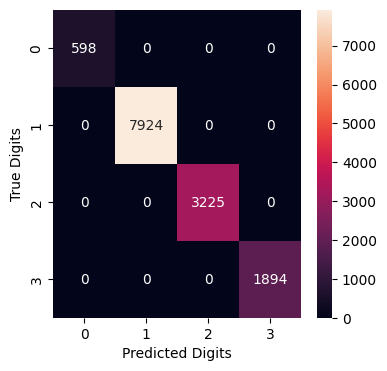

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Log accuracy is: 91.892%


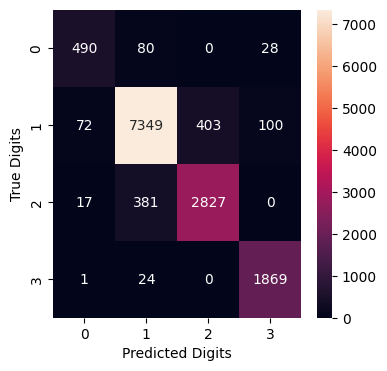

SGD accuracy is: 80.837%


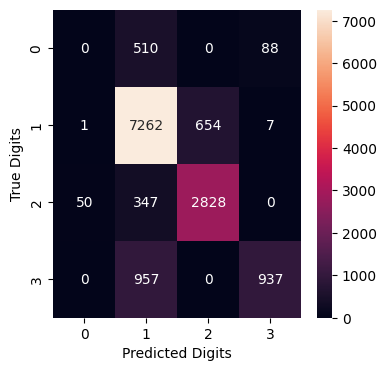

GNB accuracy is: 89.678%


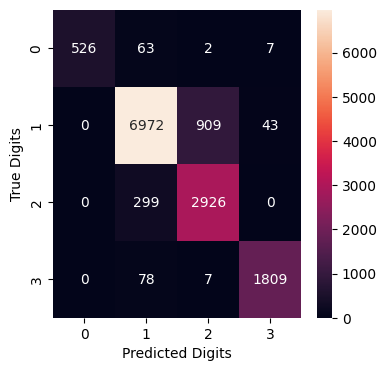

KNN accuracy is: 93.417%


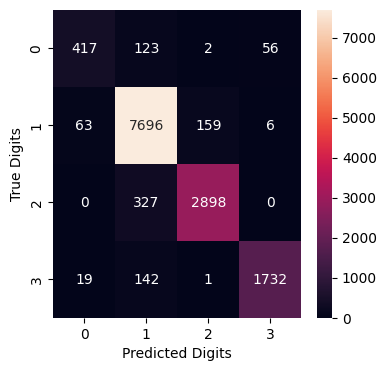

RF accuracy is: 99.751%


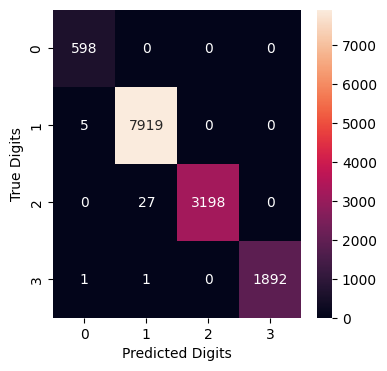

Ext accuracy is: 98.519%


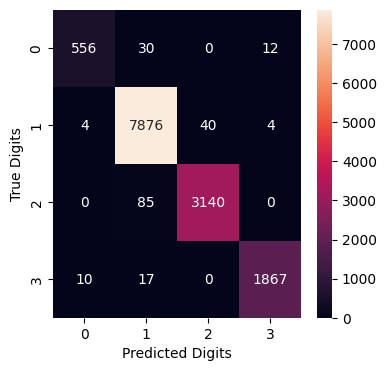

HGB accuracy is: 100.000%


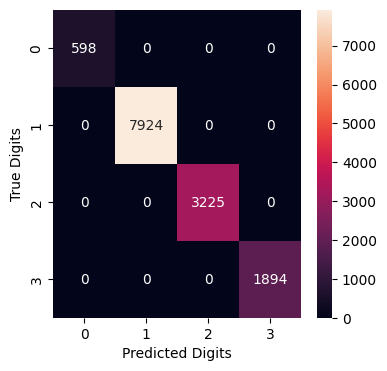

XGB accuracy is: 100.000%


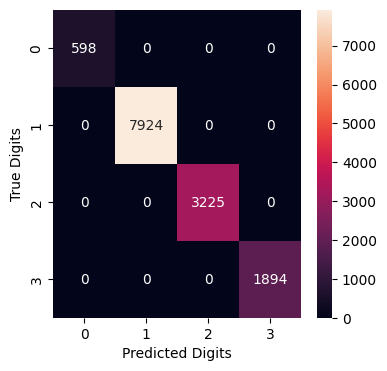

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

LGBM = LGBMClassifier()
LGBM.fit(X_train, y_train)
y_pred_LGBM = LGBM.predict(X_test) # predict our file test data
LGBM_acc = accuracy_score(y_test, y_pred_LGBM)
print("LGBM accuracy is: {0:.3f}%".format(LGBM_acc * 100))
cm = confusion_matrix(y_test, y_pred_LGBM)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()



Log = LogisticRegression()
Log.fit(X_train, y_train)
y_pred_Log = Log.predict(X_test) # predict our file test data
Log_acc = accuracy_score(y_test, y_pred_Log)
print("Log accuracy is: {0:.3f}%".format(Log_acc * 100))
cm = confusion_matrix(y_test, y_pred_Log)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

SGD = SGDClassifier()
SGD.fit(X_train, y_train)
y_pred_SGD = SGD.predict(X_test) # predict our file test data
SGD_acc = accuracy_score(y_test, y_pred_SGD)
print("SGD accuracy is: {0:.3f}%".format(SGD_acc * 100))
cm = confusion_matrix(y_test, y_pred_SGD)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred_GNB = GNB.predict(X_test) # predict our file test data
GNB_acc = accuracy_score(y_test, y_pred_GNB)
print("GNB accuracy is: {0:.3f}%".format(GNB_acc * 100))
cm = confusion_matrix(y_test, y_pred_GNB)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()


knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test) # predict our file test data
knn_acc = accuracy_score(y_test, y_pred_knn)
print("KNN accuracy is: {0:.3f}%".format(knn_acc * 100))
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()


RF = RandomForestClassifier(n_estimators=10)
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test) # predict our file test data
RF_acc = accuracy_score(y_test, y_pred_RF)
print("RF accuracy is: {0:.3f}%".format(RF_acc * 100))
cm = confusion_matrix(y_test, y_pred_RF)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()


Ext = ExtraTreesClassifier(n_estimators=10)
Ext.fit(X_train, y_train)
y_pred_Ext = Ext.predict(X_test) # predict our file test data
Ext_acc = accuracy_score(y_test, y_pred_Ext)
print("Ext accuracy is: {0:.3f}%".format(Ext_acc * 100))
cm = confusion_matrix(y_test, y_pred_Ext)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()



HGB = HistGradientBoostingClassifier()
HGB.fit(X_train, y_train)
y_pred_HGB = HGB.predict(X_test) # predict our file test data
HGB_acc = accuracy_score(y_test, y_pred_HGB)
print("HGB accuracy is: {0:.3f}%".format(HGB_acc * 100))
cm = confusion_matrix(y_test, y_pred_HGB)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()



XGB = XGBClassifier(n_estimators=10)
XGB.fit(X_train, y_train)
y_pred_XGB = XGB.predict(X_test) # predict our file test data
XGB_acc = accuracy_score(y_test, y_pred_XGB)
print("XGB accuracy is: {0:.3f}%".format(XGB_acc * 100))
cm = confusion_matrix(y_test, y_pred_XGB)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

**Data Preprocessing - Drop more column**

In [ ]:
X = df.drop(columns=['bp_category_encoded','gluc','active','alco','smoke'],axis=1)
y = df['bp_category_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
print(X_train)

[[0.96933798 1.         0.57948718 ... 1.         0.97142857 0.0818587 ]
 [0.92055749 0.         0.54871795 ... 0.         0.94285714 0.08117708]
 [0.4253194  0.         0.5025641  ... 0.         0.42857143 0.05770137]
 ...
 [0.8097561  0.         0.54871795 ... 0.         0.82857143 0.07007614]
 [0.86171119 0.         0.53846154 ... 1.         0.88571429 0.09674784]
 [0.86054975 1.         0.63589744 ... 1.         0.88571429 0.07070592]]


**Drop Column - Simple ANN Model 1**

Epoch 1/25
1706/1706 [==============================] - 8s 4ms/step - loss: 0.5866 - accuracy: 0.7846 - val_loss: 0.3196 - val_accuracy: 0.8854
Epoch 2/25
1706/1706 [==============================] - 6s 3ms/step - loss: 0.2958 - accuracy: 0.9046 - val_loss: 0.2945 - val_accuracy: 0.9190
Epoch 3/25
1706/1706 [==============================] - 7s 4ms/step - loss: 0.2794 - accuracy: 0.9131 - val_loss: 0.2805 - val_accuracy: 0.9208
Epoch 4/25
1706/1706 [==============================] - 6s 3ms/step - loss: 0.2642 - accuracy: 0.9165 - val_loss: 0.2618 - val_accuracy: 0.9117
Epoch 5/25
1706/1706 [==============================] - 7s 4ms/step - loss: 0.2408 - accuracy: 0.9166 - val_loss: 0.2416 - val_accuracy: 0.9301
Epoch 6/25
1706/1706 [==============================] - 6s 3ms/step - loss: 0.2127 - accuracy: 0.9153 - val_loss: 0.2208 - val_accuracy: 0.9294
Epoch 7/25
1706/1706 [==============================] - 7s 4ms/step - loss: 0.1910 - accuracy: 0.9184 - val_loss: 0.1889 - val_accuracy:

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Elevated'),
  Text(2, 0, 'Hypertension Stage 1'),
  Text(3, 0, 'Hypertension Stage 2')])

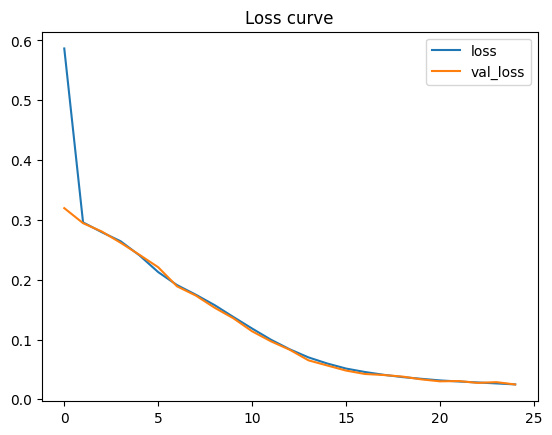

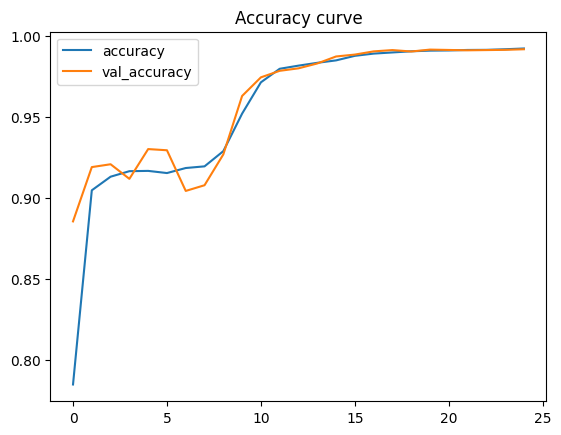

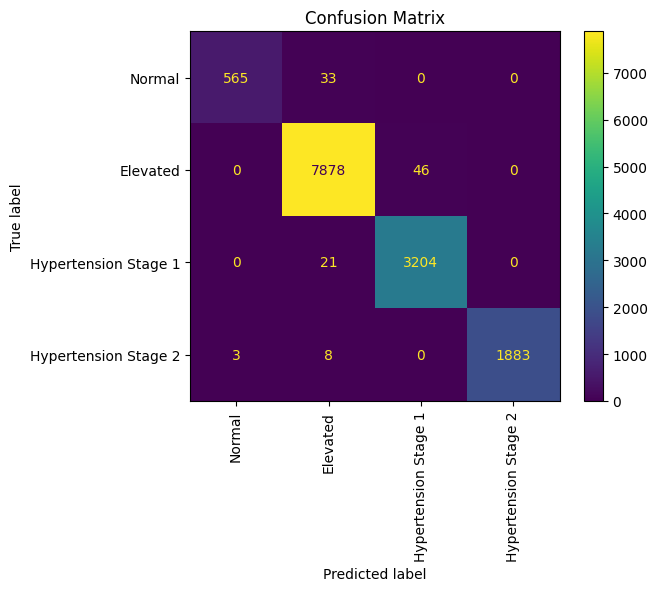

In [ ]:
#create model
model = Sequential([
    InputLayer(input_shape=10),
    Dense(10,activation='relu'),
    Dense(10,activation='relu'),
    Dense(4, activation='softmax'),
])

#compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(X_train,y_train,
                   epochs=25,
                   validation_data=[X_test,y_test])

model.summary()
plot_model(model,show_shapes=True)
#checking model training loss history
loss=history.history['loss']
val_loss=history.history['val_loss']
losses = pd.DataFrame({'loss':loss,'val_loss':val_loss})

#checking model training accuracy history
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
acc = pd.DataFrame({'accuracy':accuracy,'val_accuracy':val_accuracy})


losses.plot(title='Loss curve')
acc.plot(title='Accuracy curve')
loss,acc = model.evaluate(X_test,y_test)
print(f"Model loss: {loss:.3f}")
print(f"Model accuracy: {acc*100:.2f}%")
y_probs = model.predict(X_test)
y_preds = tf.argmax(y_probs,axis=1)
acc_score=accuracy_score(y_test,y_preds)

print(classification_report(y_test,y_preds))
print(f'Accuracy is {acc_score*100:.2f}%')

#Making Confusion Matrix
cm = confusion_matrix(y_test,y_preds)

#using ConfusionMatrixDisplay to output a good confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=bp_categories)
disp.plot()
plt.title("Confusion Matrix")
plt.xticks(rotation=90)

**Drop Column - Simple ANN Model 2**

Epoch 1/25
1706/1706 [==============================] - 15s 8ms/step - loss: 0.4357 - accuracy: 0.8425 - val_loss: 0.2796 - val_accuracy: 0.9191
Epoch 2/25
1706/1706 [==============================] - 12s 7ms/step - loss: 0.2592 - accuracy: 0.9109 - val_loss: 0.2512 - val_accuracy: 0.9126
Epoch 3/25
1706/1706 [==============================] - 10s 6ms/step - loss: 0.2325 - accuracy: 0.9142 - val_loss: 0.2221 - val_accuracy: 0.9010
Epoch 4/25
1706/1706 [==============================] - 8s 5ms/step - loss: 0.2064 - accuracy: 0.9145 - val_loss: 0.2008 - val_accuracy: 0.9006
Epoch 5/25
1706/1706 [==============================] - 7s 4ms/step - loss: 0.1737 - accuracy: 0.9305 - val_loss: 0.1619 - val_accuracy: 0.9510
Epoch 6/25
1706/1706 [==============================] - 7s 4ms/step - loss: 0.1386 - accuracy: 0.9580 - val_loss: 0.1287 - val_accuracy: 0.9593
Epoch 7/25
1706/1706 [==============================] - 6s 4ms/step - loss: 0.1064 - accuracy: 0.9720 - val_loss: 0.0892 - val_accura

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Elevated'),
  Text(2, 0, 'Hypertension Stage 1'),
  Text(3, 0, 'Hypertension Stage 2')])

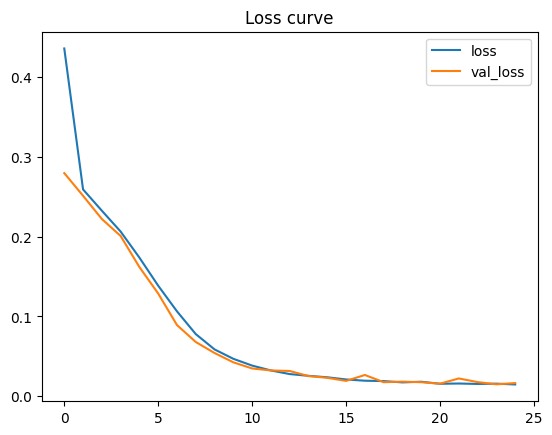

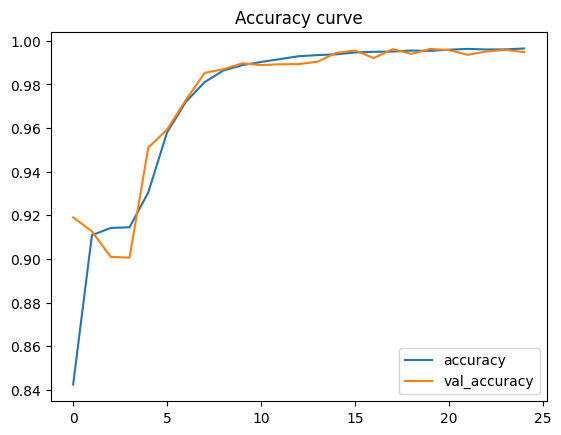

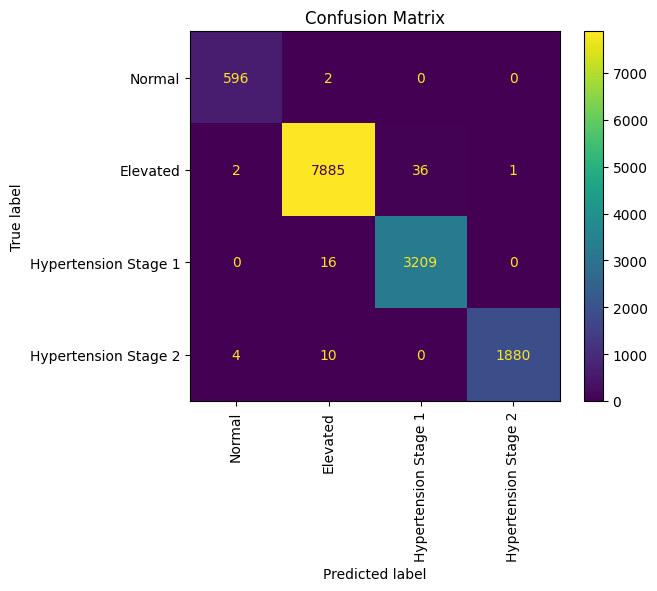

In [ ]:
#create model
model = Sequential([
    InputLayer(input_shape=10),
    Dense(10,activation='relu'),
    Dense(20,activation='relu'),
    Dense(10,activation='relu'),
    Dense(4, activation='softmax'),
])

#compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(X_train,y_train,
                   epochs=25,
                   validation_data=[X_test,y_test])

model.summary()
plot_model(model,show_shapes=True)
#checking model training loss history
loss=history.history['loss']
val_loss=history.history['val_loss']
losses = pd.DataFrame({'loss':loss,'val_loss':val_loss})

#checking model training accuracy history
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
acc = pd.DataFrame({'accuracy':accuracy,'val_accuracy':val_accuracy})


losses.plot(title='Loss curve')
acc.plot(title='Accuracy curve')
loss,acc = model.evaluate(X_test,y_test)
print(f"Model loss: {loss:.3f}")
print(f"Model accuracy: {acc*100:.2f}%")
y_probs = model.predict(X_test)
y_preds = tf.argmax(y_probs,axis=1)
acc_score=accuracy_score(y_test,y_preds)

print(classification_report(y_test,y_preds))
print(f'Accuracy is {acc_score*100:.2f}%')

#Making Confusion Matrix
cm = confusion_matrix(y_test,y_preds)

#using ConfusionMatrixDisplay to output a good confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=bp_categories)
disp.plot()
plt.title("Confusion Matrix")
plt.xticks(rotation=90)

**Drop Column - Simple ANN Model 3**

Epoch 1/25
1706/1706 [==============================] - 9s 4ms/step - loss: 0.5144 - accuracy: 0.8080 - val_loss: 0.3141 - val_accuracy: 0.8989
Epoch 2/25
1706/1706 [==============================] - 6s 4ms/step - loss: 0.2844 - accuracy: 0.9070 - val_loss: 0.2909 - val_accuracy: 0.8976
Epoch 3/25
1706/1706 [==============================] - 8s 5ms/step - loss: 0.2716 - accuracy: 0.9149 - val_loss: 0.2765 - val_accuracy: 0.9145
Epoch 4/25
1706/1706 [==============================] - 6s 4ms/step - loss: 0.2649 - accuracy: 0.9176 - val_loss: 0.2687 - val_accuracy: 0.9007
Epoch 5/25
1706/1706 [==============================] - 7s 4ms/step - loss: 0.2549 - accuracy: 0.9265 - val_loss: 0.2562 - val_accuracy: 0.9358
Epoch 6/25
1706/1706 [==============================] - 6s 4ms/step - loss: 0.2434 - accuracy: 0.9348 - val_loss: 0.2493 - val_accuracy: 0.9393
Epoch 7/25
1706/1706 [==============================] - 7s 4ms/step - loss: 0.2224 - accuracy: 0.9392 - val_loss: 0.2076 - val_accuracy:

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Elevated'),
  Text(2, 0, 'Hypertension Stage 1'),
  Text(3, 0, 'Hypertension Stage 2')])

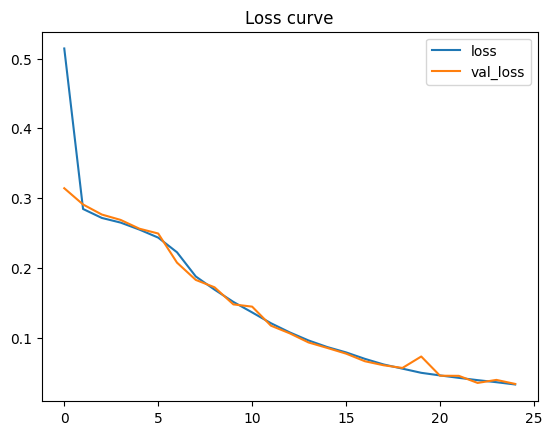

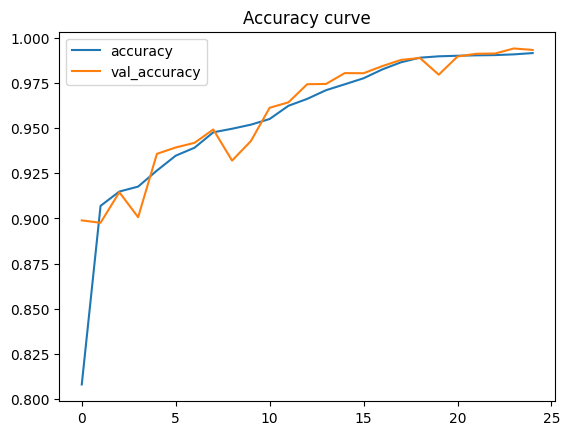

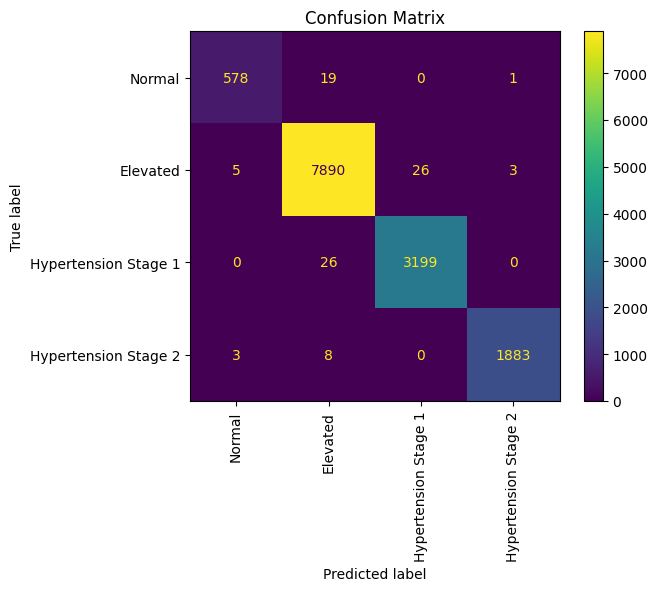

In [ ]:
#create model
model = Sequential([
    InputLayer(input_shape=10),
    Dense(10,activation='relu'),
    Dense(10,activation='relu'),
    Dense(10,activation='relu'),
    Dense(4, activation='softmax'),
])

#compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = model.fit(X_train,y_train,
                   epochs=25,
                   validation_data=[X_test,y_test])

model.summary()
plot_model(model,show_shapes=True)
#checking model training loss history
loss=history.history['loss']
val_loss=history.history['val_loss']
losses = pd.DataFrame({'loss':loss,'val_loss':val_loss})

#checking model training accuracy history
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
acc = pd.DataFrame({'accuracy':accuracy,'val_accuracy':val_accuracy})


losses.plot(title='Loss curve')
acc.plot(title='Accuracy curve')
loss,acc = model.evaluate(X_test,y_test)
print(f"Model loss: {loss:.3f}")
print(f"Model accuracy: {acc*100:.2f}%")
y_probs = model.predict(X_test)
y_preds = tf.argmax(y_probs,axis=1)
acc_score=accuracy_score(y_test,y_preds)

print(classification_report(y_test,y_preds))
print(f'Accuracy is {acc_score*100:.2f}%')

#Making Confusion Matrix
cm = confusion_matrix(y_test,y_preds)

#using ConfusionMatrixDisplay to output a good confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=bp_categories)
disp.plot()
plt.title("Confusion Matrix")
plt.xticks(rotation=90)

**Drop columns - Machine Learning Models**

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 907
[LightGBM] [Info] Number of data points in the train set: 54564, number of used features: 10
[LightGBM] [Info] Start training from score -3.081884
[LightGBM] [Info] Start training from score -0.539091
[LightGBM] [Info] Start training from score -1.456828
[LightGBM] [Info] Start training from score -1.981409
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

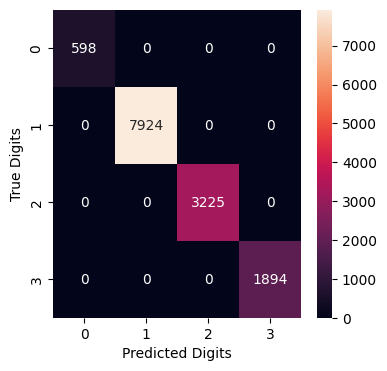

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Log accuracy is: 92.105%


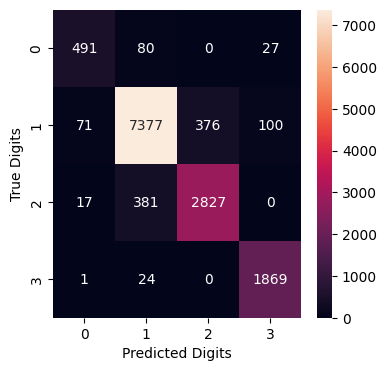

SGD accuracy is: 77.245%


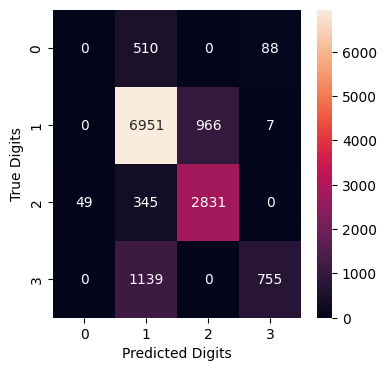

GNB accuracy is: 90.389%


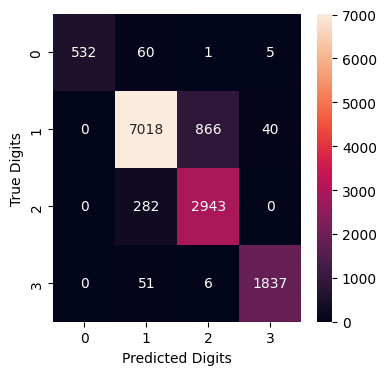

KNN accuracy is: 97.324%


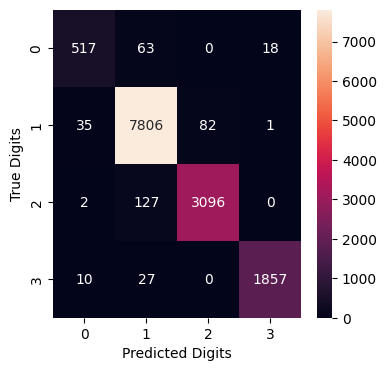

RF accuracy is: 99.949%


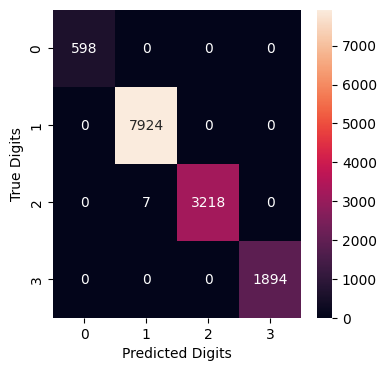

Ext accuracy is: 99.428%


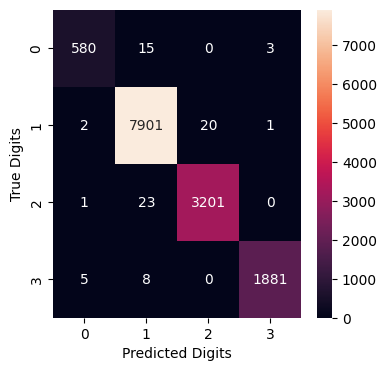

HGB accuracy is: 100.000%


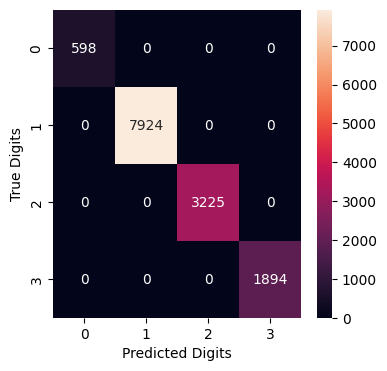

XGB accuracy is: 100.000%


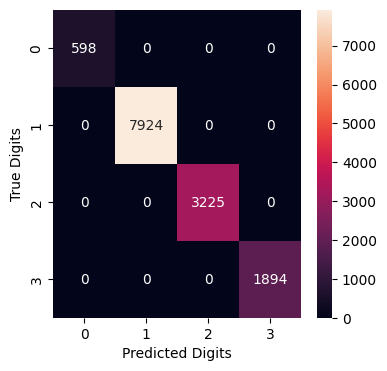

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

LGBM = LGBMClassifier()
LGBM.fit(X_train, y_train)
y_pred_LGBM = LGBM.predict(X_test) # predict our file test data
LGBM_acc = accuracy_score(y_test, y_pred_LGBM)
print("LGBM accuracy is: {0:.3f}%".format(LGBM_acc * 100))
cm = confusion_matrix(y_test, y_pred_LGBM)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()



Log = LogisticRegression()
Log.fit(X_train, y_train)
y_pred_Log = Log.predict(X_test) # predict our file test data
Log_acc = accuracy_score(y_test, y_pred_Log)
print("Log accuracy is: {0:.3f}%".format(Log_acc * 100))
cm = confusion_matrix(y_test, y_pred_Log)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

SGD = SGDClassifier()
SGD.fit(X_train, y_train)
y_pred_SGD = SGD.predict(X_test) # predict our file test data
SGD_acc = accuracy_score(y_test, y_pred_SGD)
print("SGD accuracy is: {0:.3f}%".format(SGD_acc * 100))
cm = confusion_matrix(y_test, y_pred_SGD)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred_GNB = GNB.predict(X_test) # predict our file test data
GNB_acc = accuracy_score(y_test, y_pred_GNB)
print("GNB accuracy is: {0:.3f}%".format(GNB_acc * 100))
cm = confusion_matrix(y_test, y_pred_GNB)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()


knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test) # predict our file test data
knn_acc = accuracy_score(y_test, y_pred_knn)
print("KNN accuracy is: {0:.3f}%".format(knn_acc * 100))
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()


RF = RandomForestClassifier(n_estimators=10)
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test) # predict our file test data
RF_acc = accuracy_score(y_test, y_pred_RF)
print("RF accuracy is: {0:.3f}%".format(RF_acc * 100))
cm = confusion_matrix(y_test, y_pred_RF)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()


Ext = ExtraTreesClassifier(n_estimators=10)
Ext.fit(X_train, y_train)
y_pred_Ext = Ext.predict(X_test) # predict our file test data
Ext_acc = accuracy_score(y_test, y_pred_Ext)
print("Ext accuracy is: {0:.3f}%".format(Ext_acc * 100))
cm = confusion_matrix(y_test, y_pred_Ext)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()



HGB = HistGradientBoostingClassifier()
HGB.fit(X_train, y_train)
y_pred_HGB = HGB.predict(X_test) # predict our file test data
HGB_acc = accuracy_score(y_test, y_pred_HGB)
print("HGB accuracy is: {0:.3f}%".format(HGB_acc * 100))
cm = confusion_matrix(y_test, y_pred_HGB)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()



XGB = XGBClassifier(n_estimators=10)
XGB.fit(X_train, y_train)
y_pred_XGB = XGB.predict(X_test) # predict our file test data
XGB_acc = accuracy_score(y_test, y_pred_XGB)
print("XGB accuracy is: {0:.3f}%".format(XGB_acc * 100))
cm = confusion_matrix(y_test, y_pred_XGB)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()